# HEART DISEASE

Machine learning models can be trained on datasets containing these attributes to predict heart disease
risk with high accuracy, often over 90%. The most predictive features are:
    
1. Age and sex - risk increases with age and is higher in males
2. Chest pain type - typical angina most indicative of heart disease
3. Resting ECG abnormalities - associated with heart disease
4. Exercise test results - exercise-induced angina, ST depression, and downsloping ST segment slope are positive signs

Other important features include:
5. Resting blood pressure - high blood pressure damages arteries
6. Serum cholesterol - high LDL narrows arteries
7. Fasting blood sugar - impaired glucose tolerance or diabetes ups risk

Machine learning algorithms like logistic regression, decision trees, random forests, SVMs, and neural
networks can leverage these features to build predictive models for heart disease. The specific importance of
each feature depends on the model and dataset used. But in general, these attributes provide a robust set
of inputs for accurately predicting heart disease risk using machine learning techniques.

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install statsmodels

In [7]:
import pandas as pd #reading datasets
import numpy as np #operations on our dataset
import matplotlib.pyplot as plt #visualization library 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV #Optimizing our model
from sklearn.preprocessing import StandardScaler, LabelEncoder #Preparing our data for modeling
from sklearn.linear_model import LogisticRegressionCV # Linear model for classification
from sklearn.tree import DecisionTreeClassifier #Tree model for classification
from sklearn.svm import SVC # Hyperplane model for classification
from sklearn.ensemble import RandomForestClassifier # Tree boosting model for classification
from sklearn.neural_network import MLPClassifier #Neural network for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve #Metrics used for evaluating model performance
from xgboost import XGBClassifier # Boosting model for classificationfrom statsmodels.stats.outliers_influence import variance_inflation_factor #Handling multicollinearity

In [2]:
#import relevant datasets
import pandas as pd
import numpy as np
import os

In [8]:
#load the dataset
data = pd.read_csv('heart_disease.csv')

In [9]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [10]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# Data Visualization

In [14]:
data.shape[1]

12

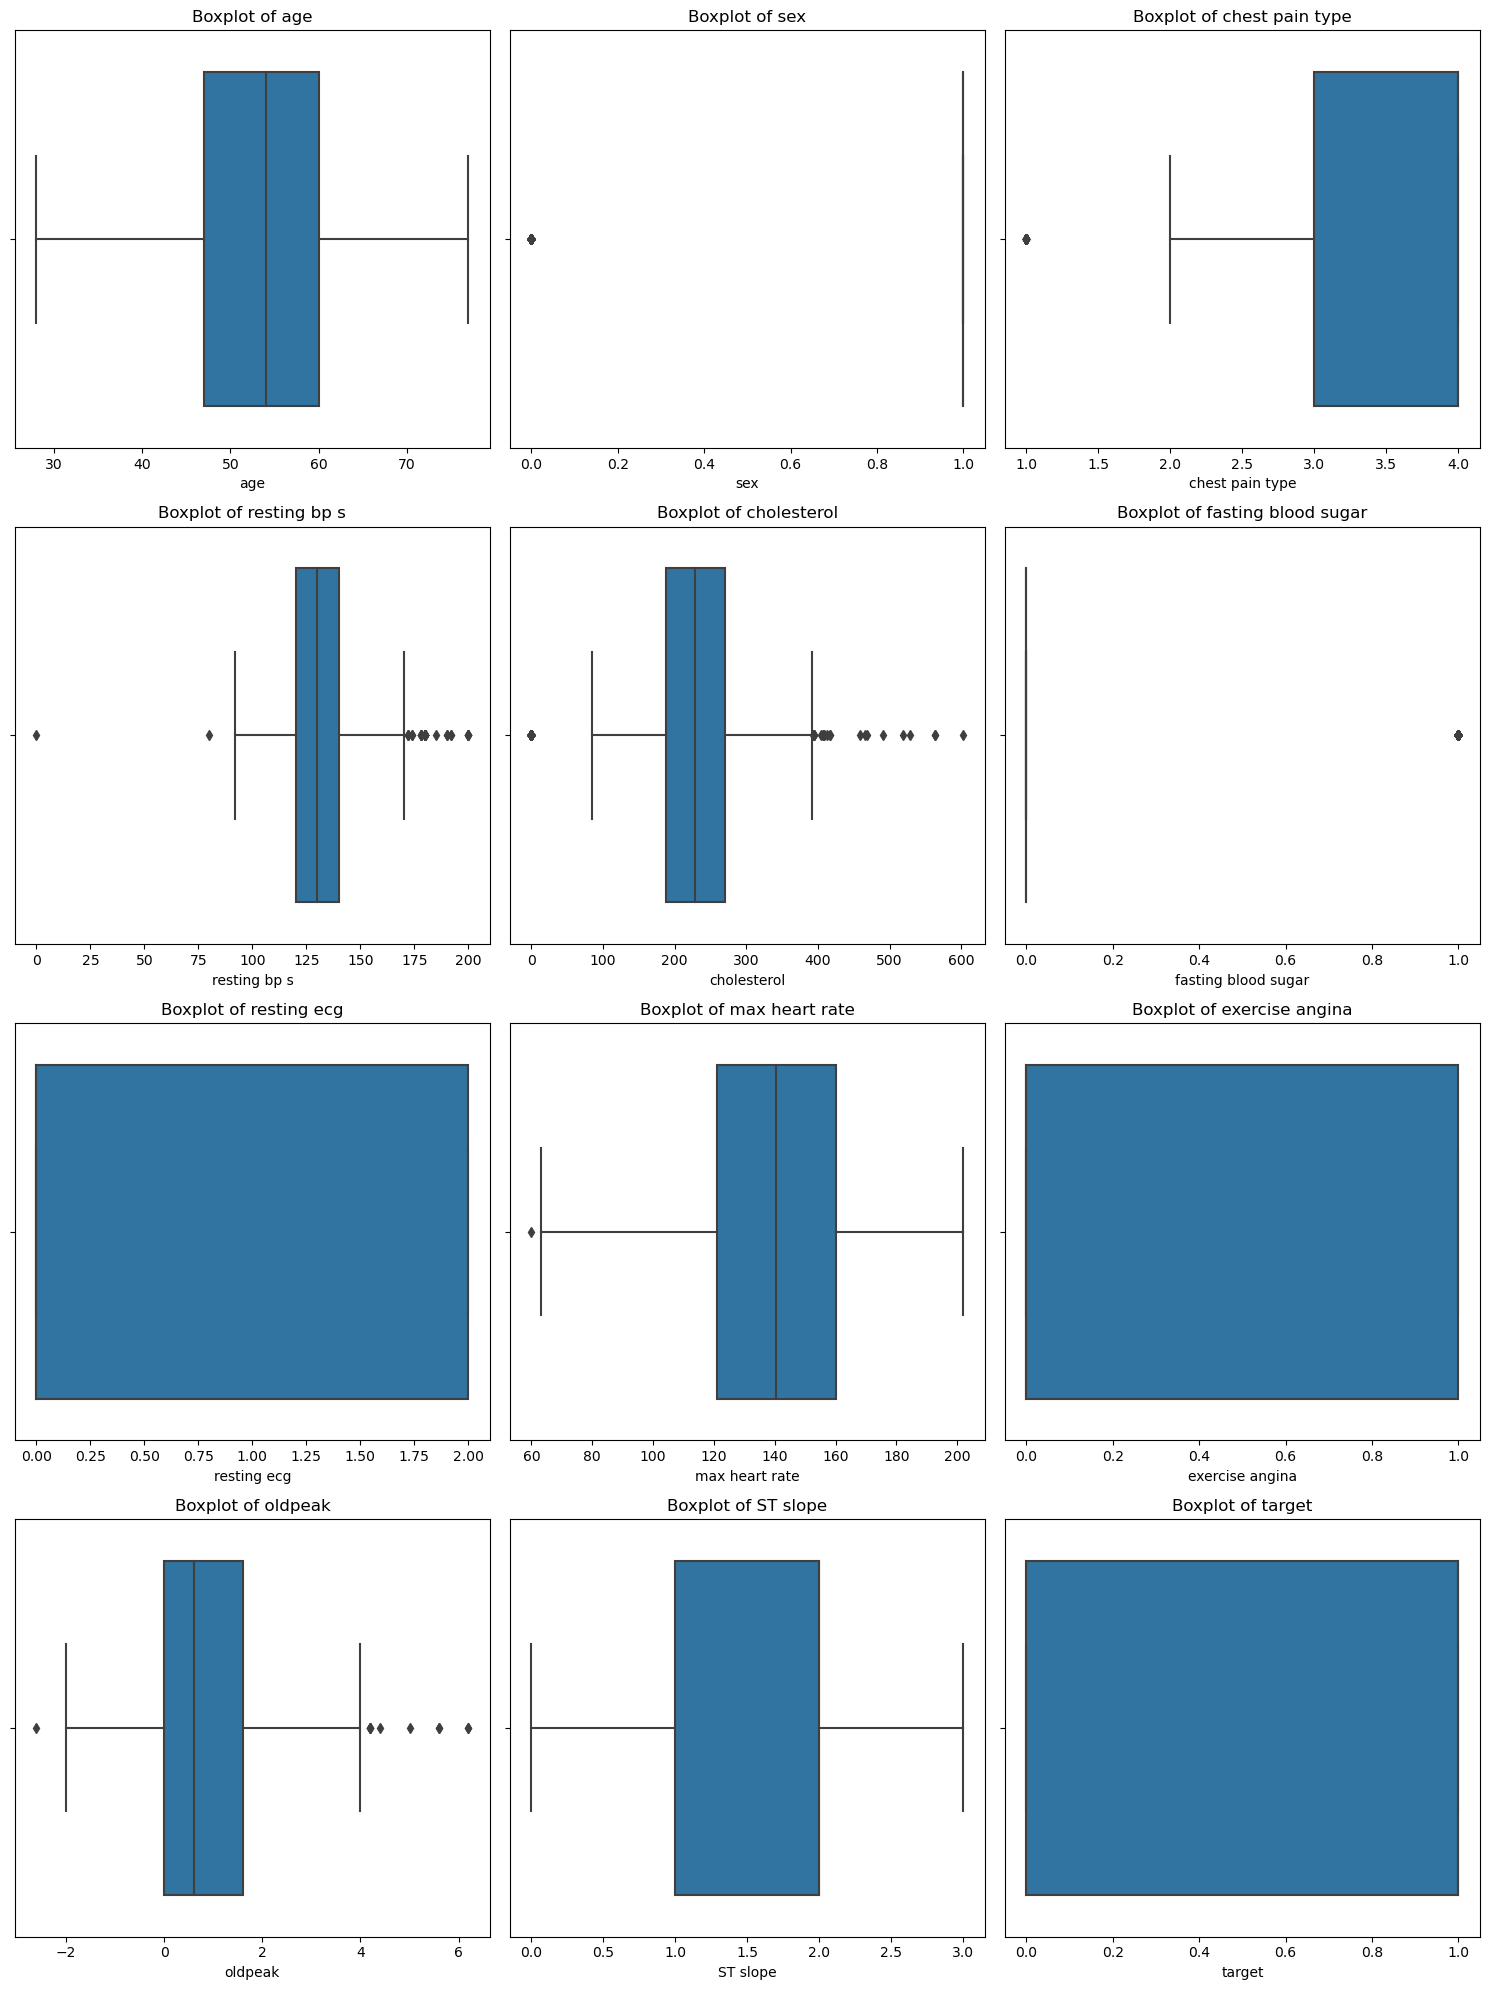

In [15]:
import warnings

# To suppress all warnings:
warnings.filterwarnings('ignore')

#Checking distributions of the various features in the dataset

num_cols = data.shape[1]
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(data.columns, 1):
    if data[col].dtype != 'object':
        plt.subplot(num_rows, 3, i)  # 3 columns per row
        sns.boxplot(x=data[col], orient='vertical')
        plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Boxplot of Cholestrol has the highest number of outliers

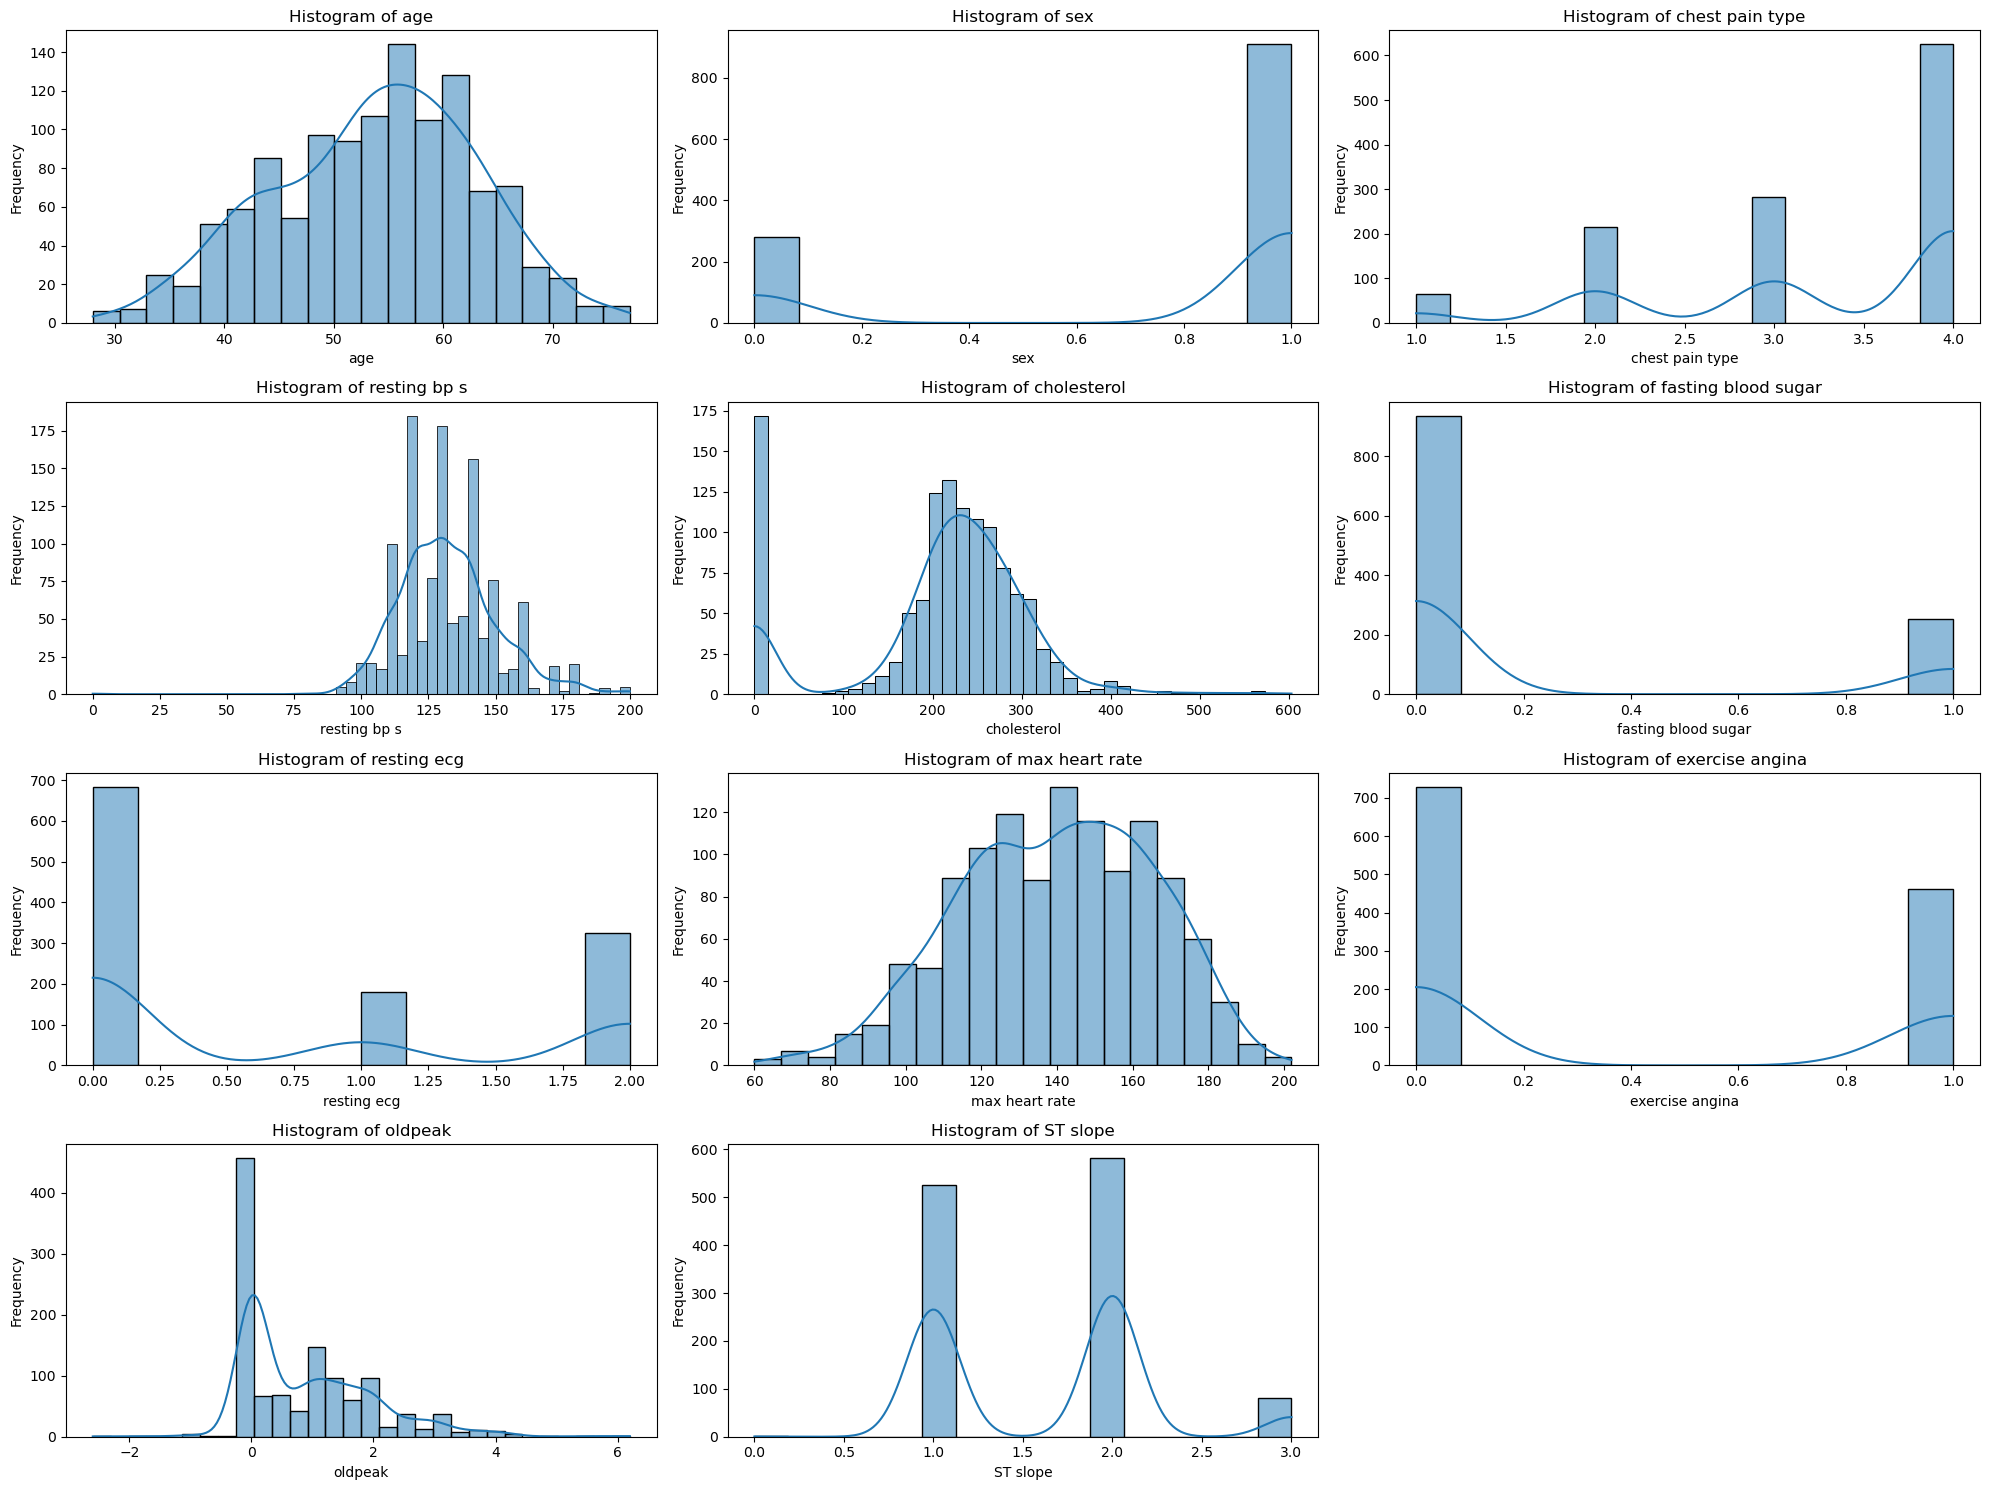

In [31]:
#histogram plots

# Columns to plot
cols = ['age', 'sex', 'chest pain type', 'resting bp s',
        'cholesterol', 'fasting blood sugar', 'resting ecg', 
        'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']

# Create a histogram for each column
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols):
    plt.subplot(len(cols) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


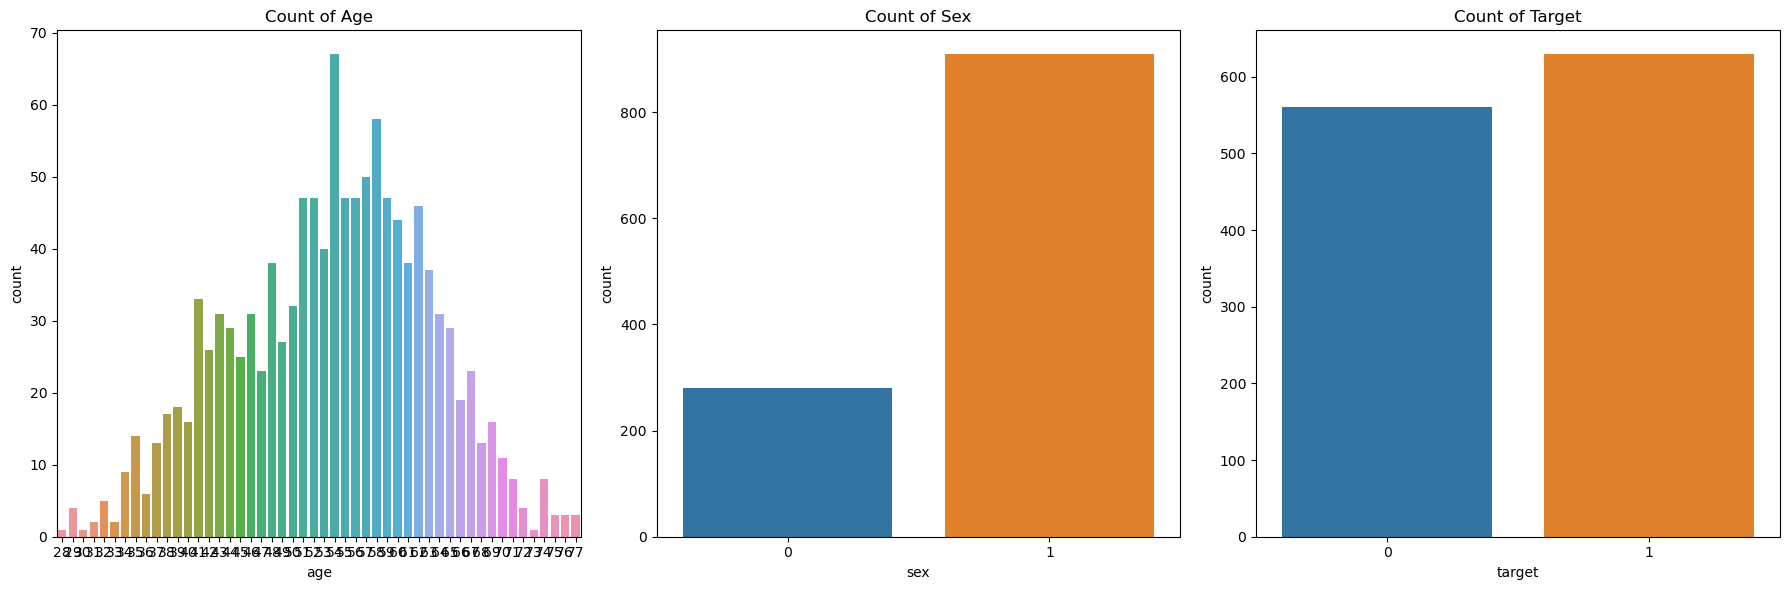

In [43]:


# Assuming 'data' is your DataFrame containing the variables 'age', 'sex', and 'target'
data = pd.read_csv('heart_disease.csv')

# Set up the figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create count plots for each variable
sns.countplot(x='age', data=data, ax=axs[0])
axs[0].set_title('Count of Age')

sns.countplot(x='sex', data=data, ax=axs[1])
axs[1].set_title('Count of Sex')

sns.countplot(x='target', data=data, ax=axs[2])
axs[2].set_title('Count of Target')

plt.tight_layout()
plt.show()

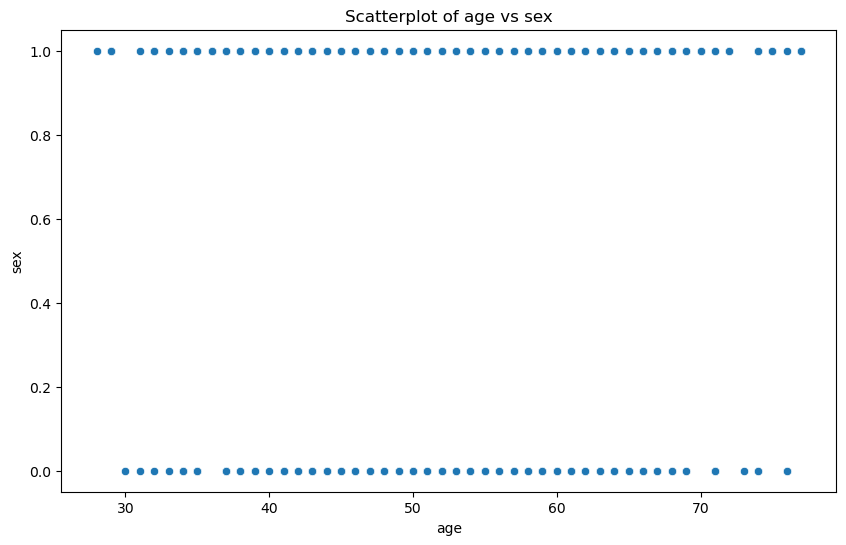

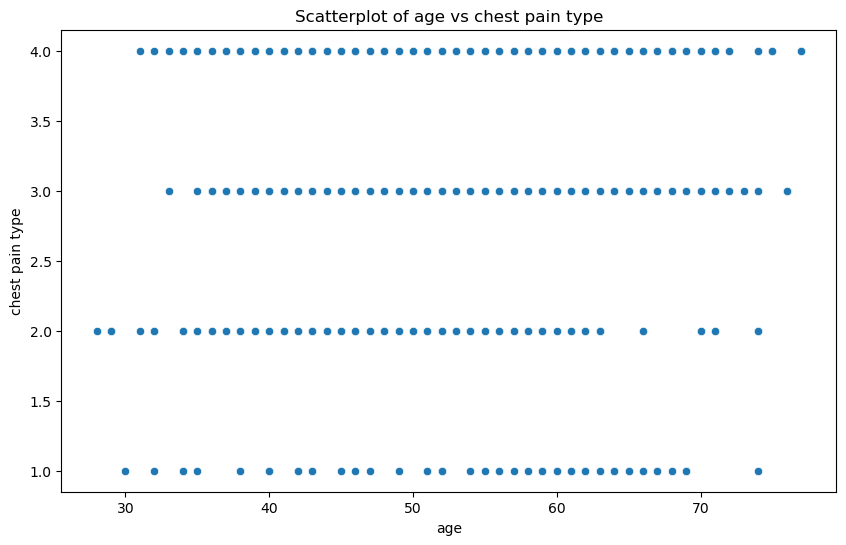

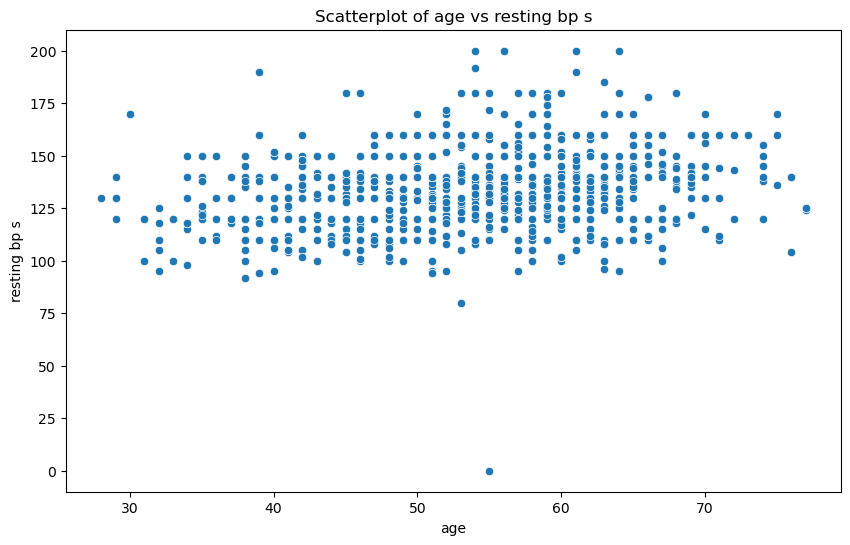

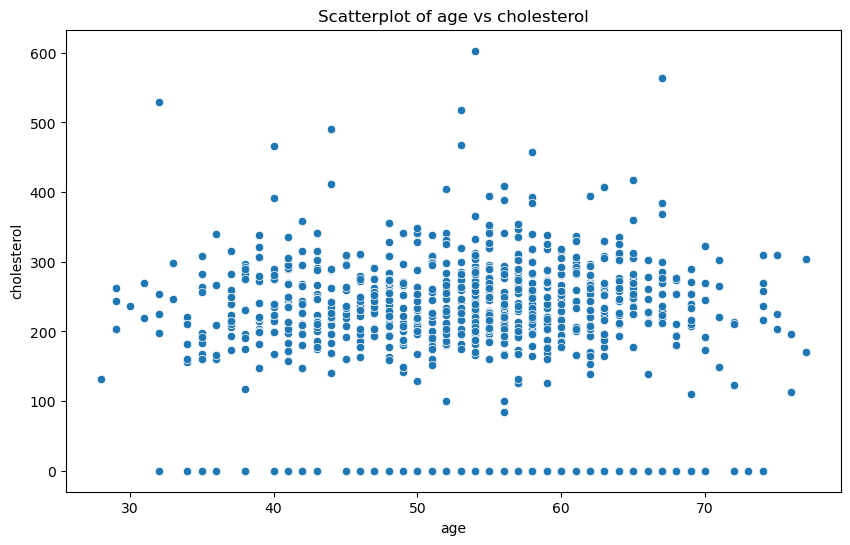

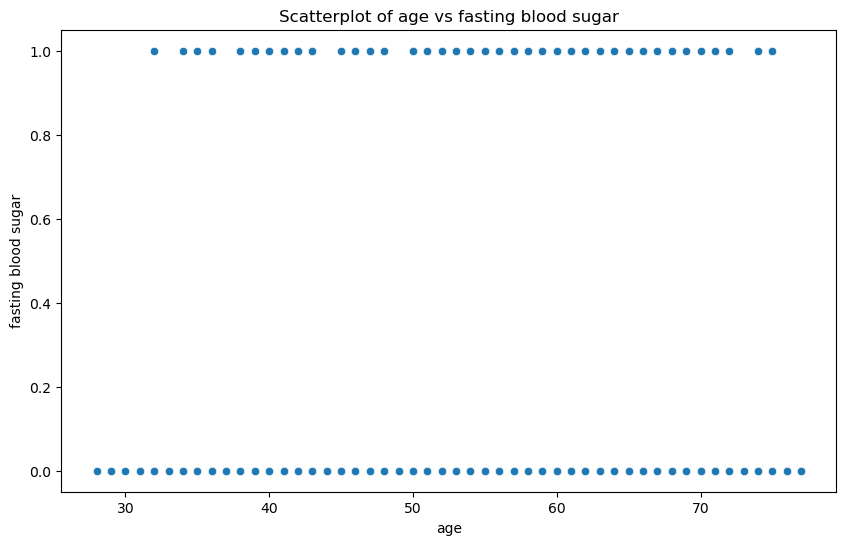

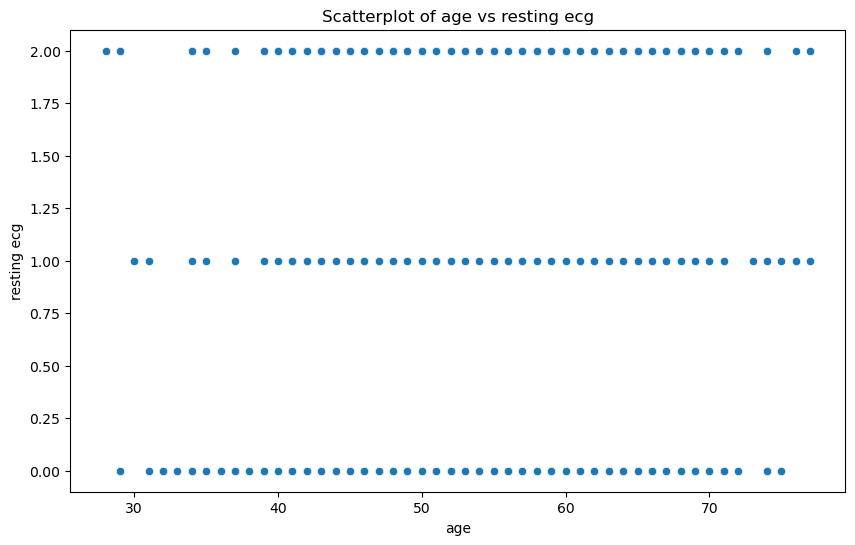

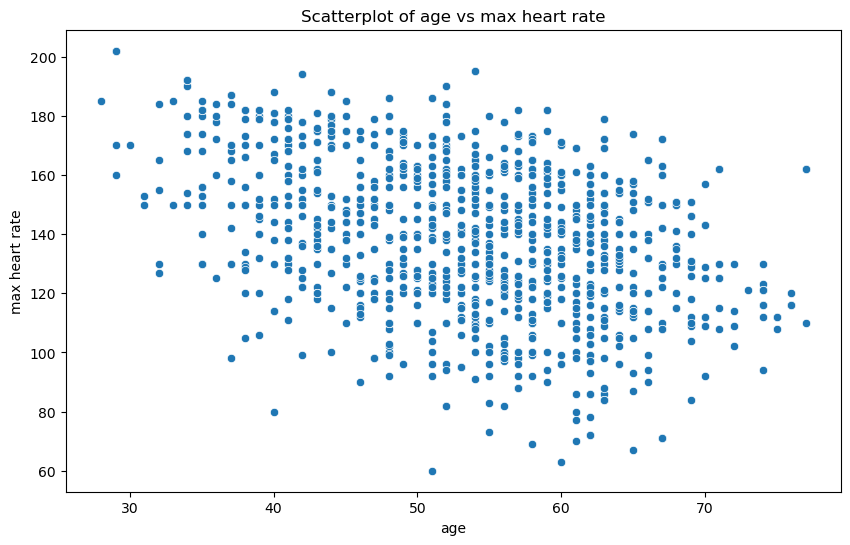

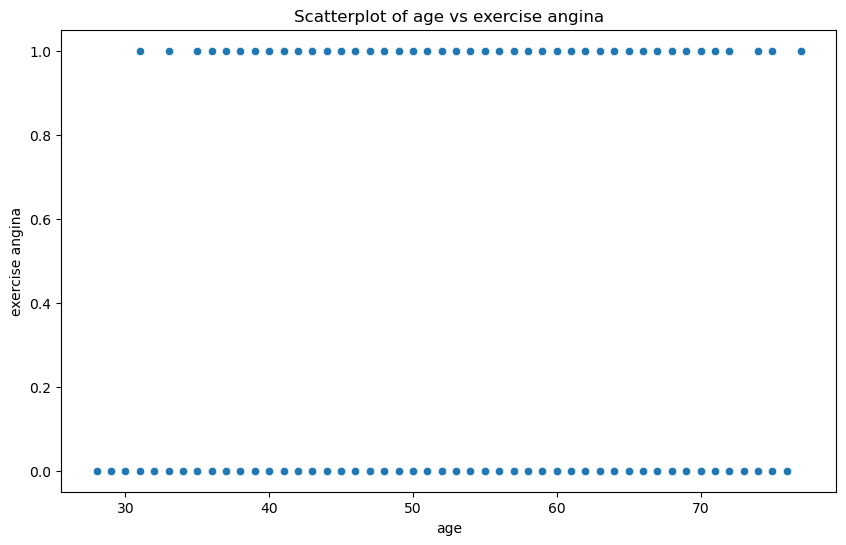

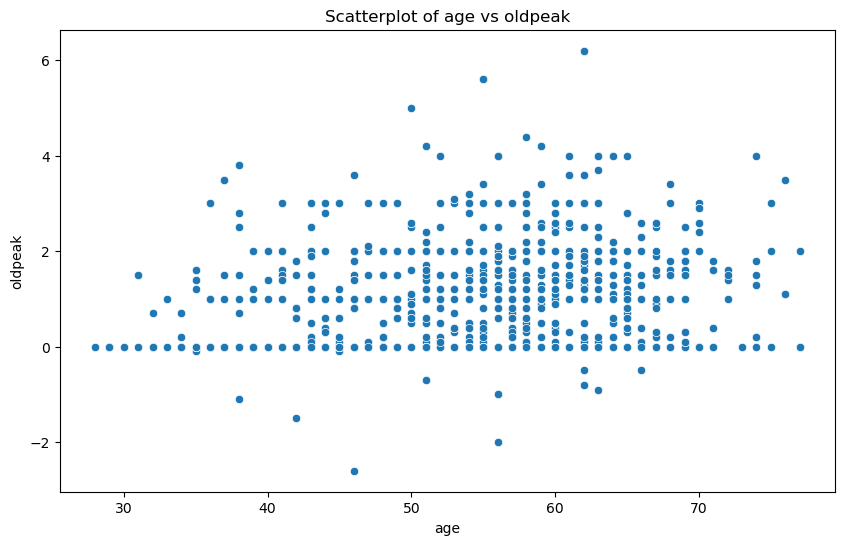

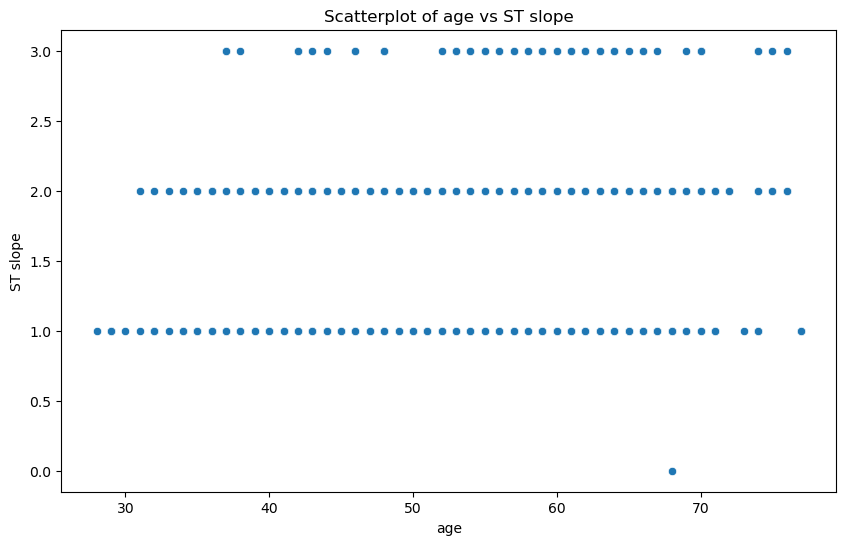

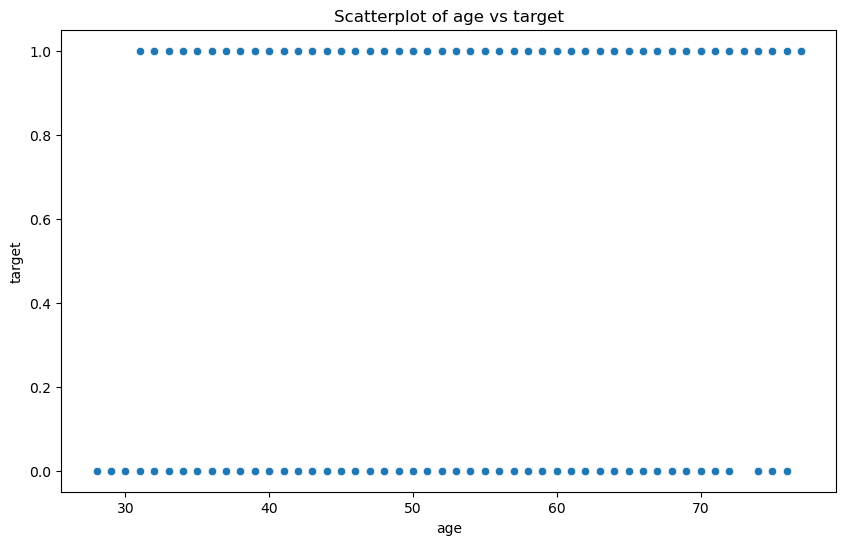

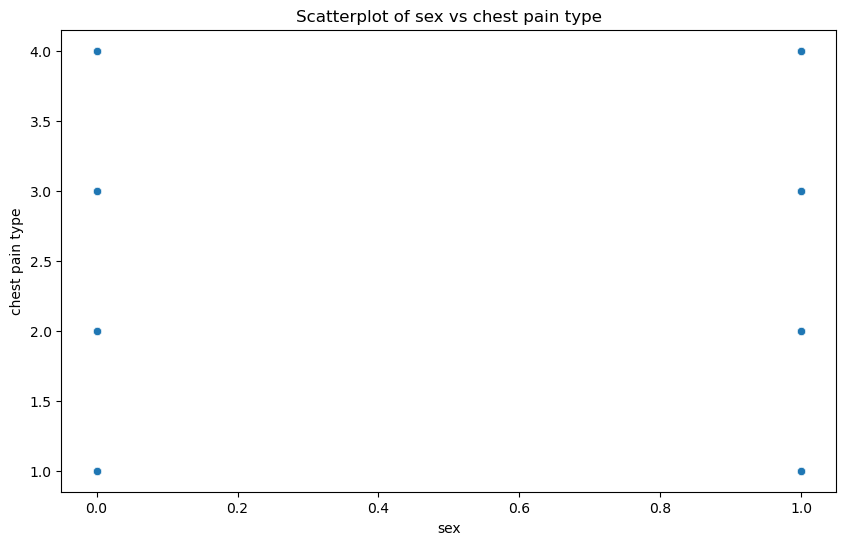

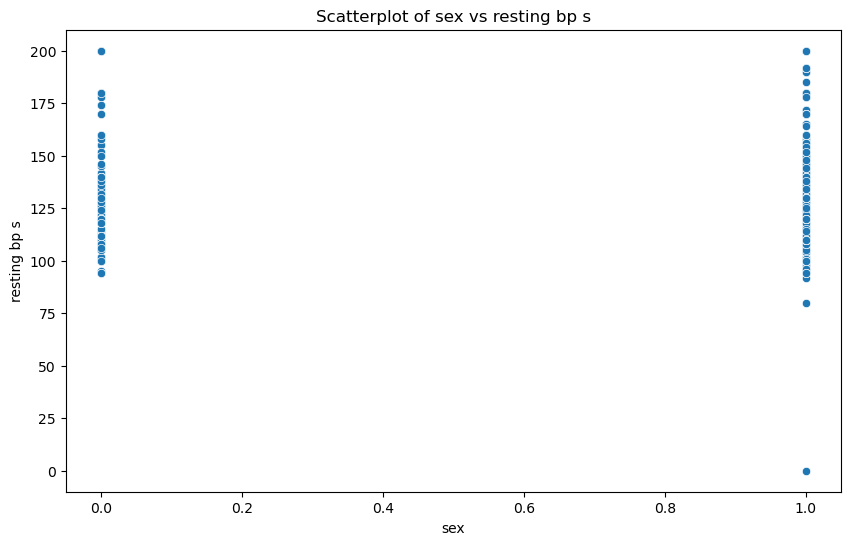

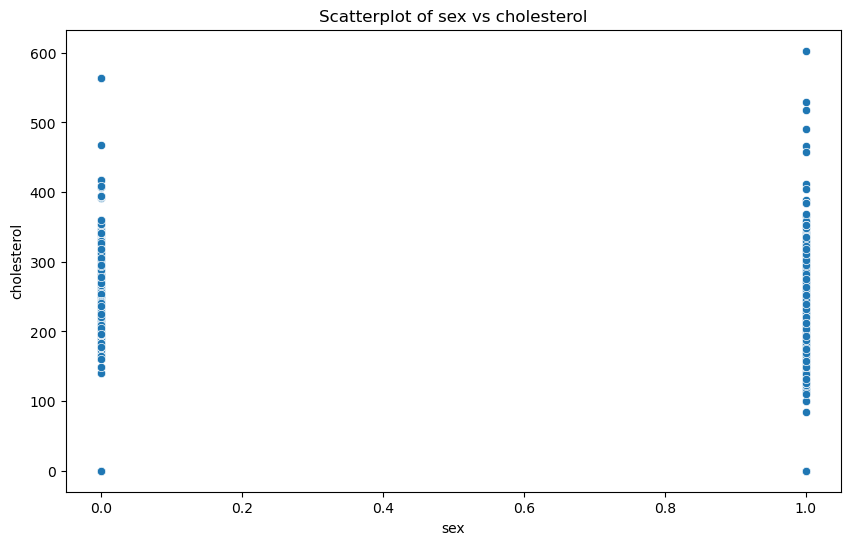

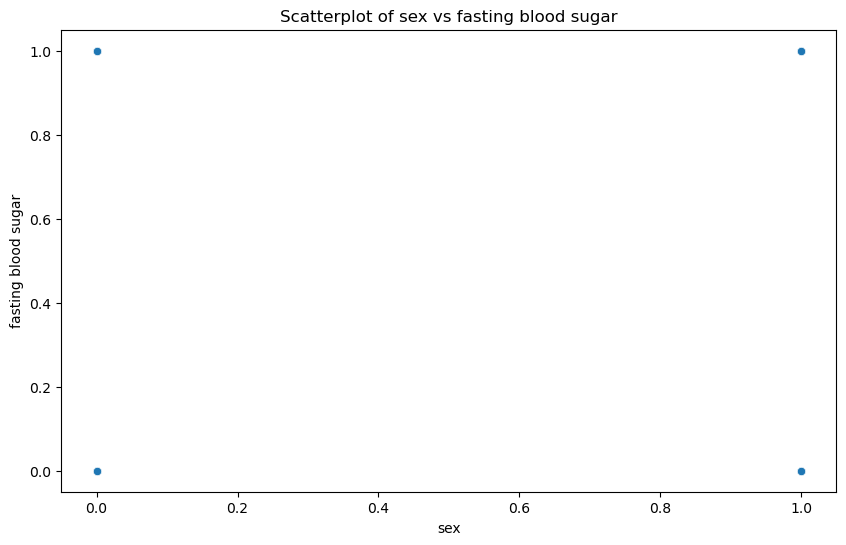

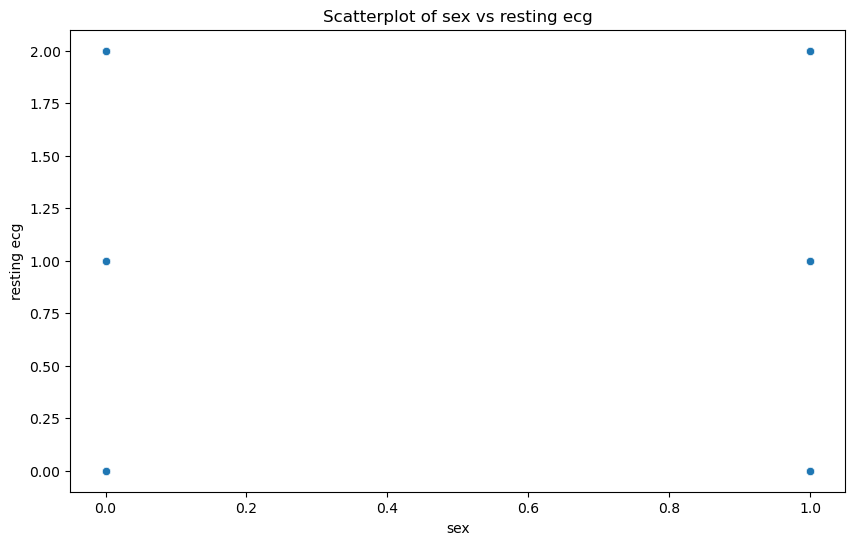

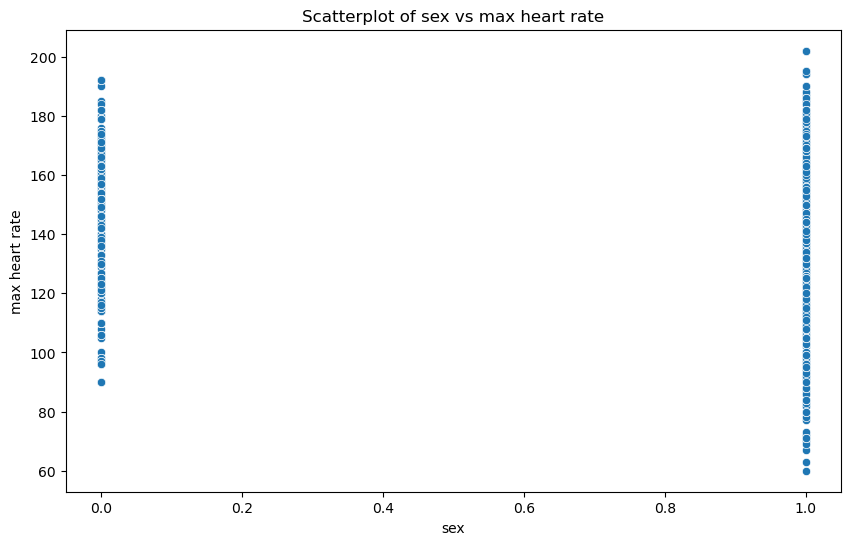

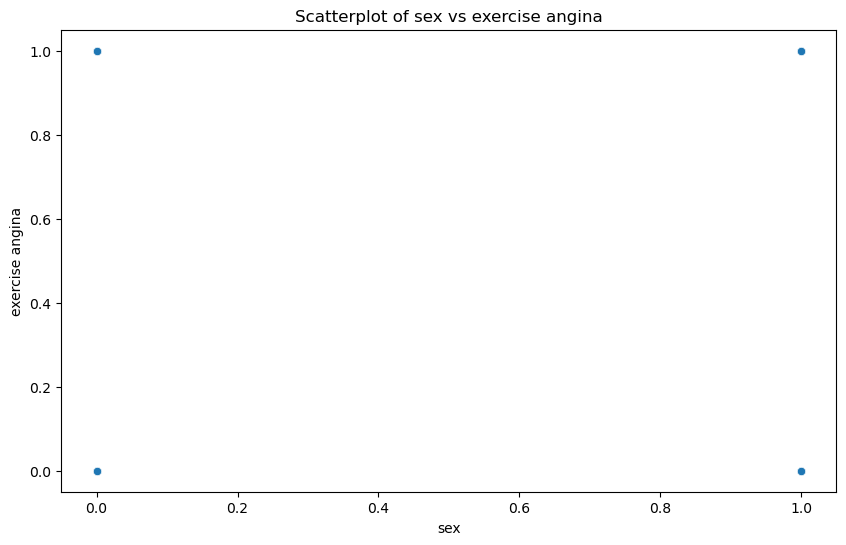

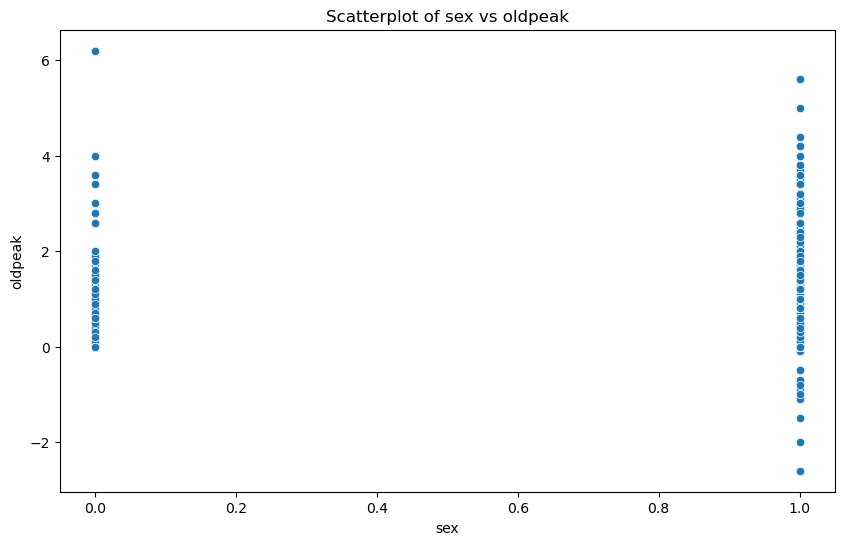

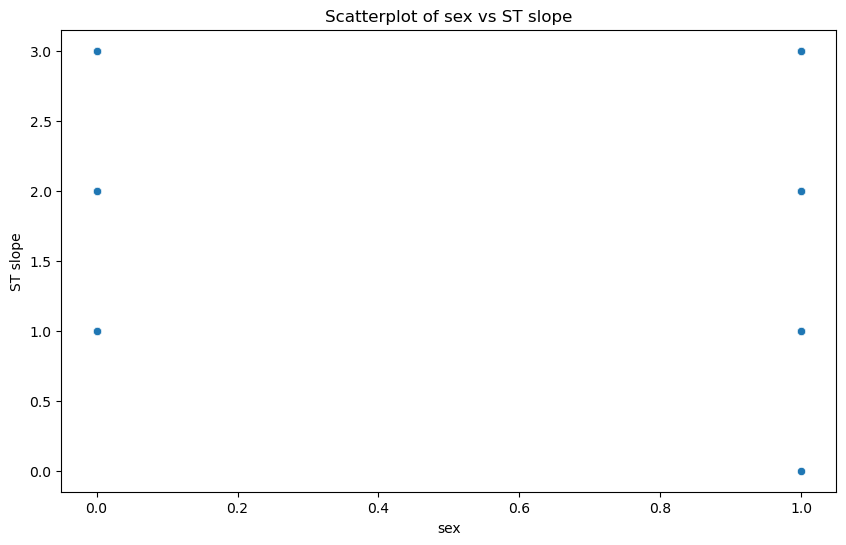

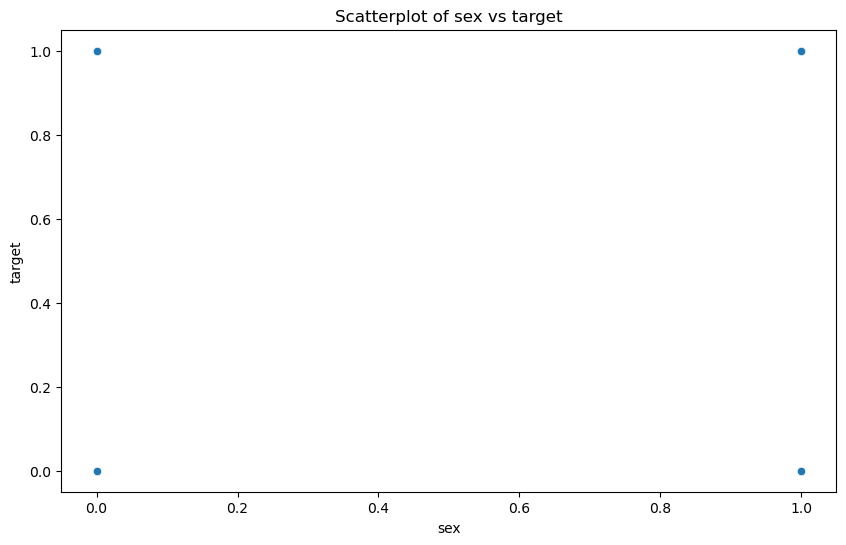

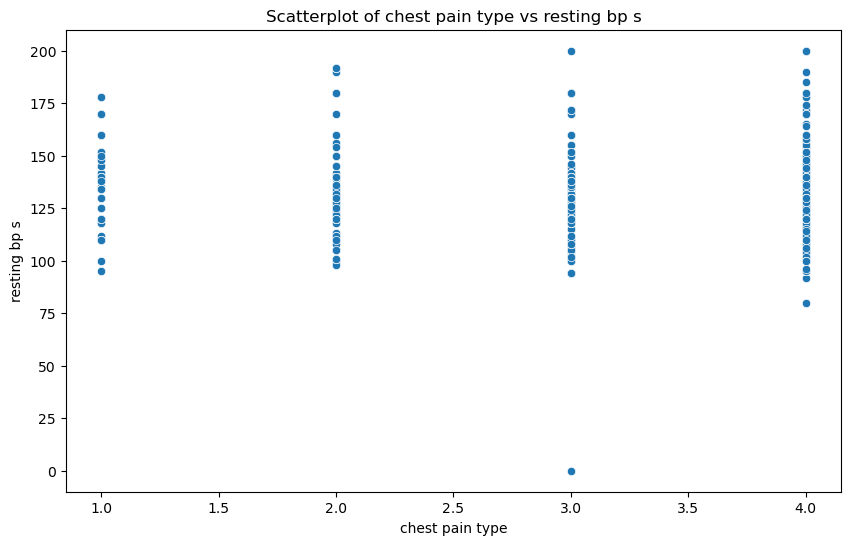

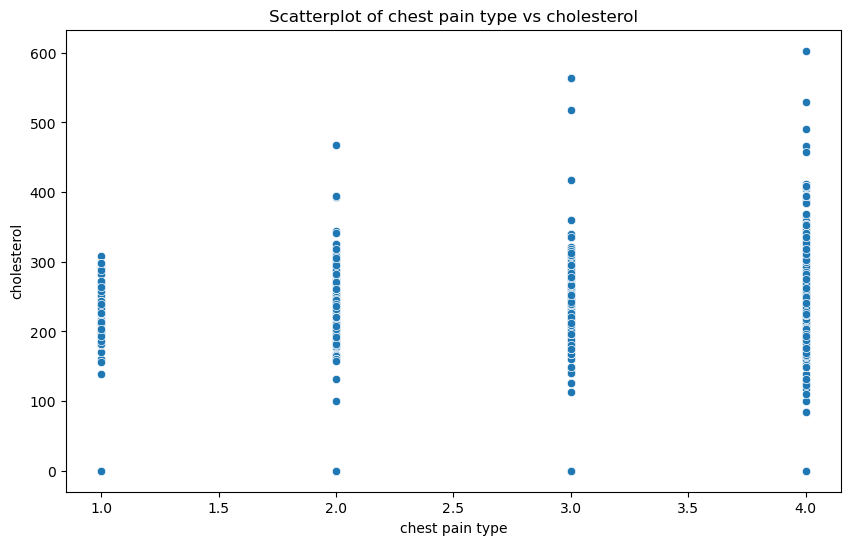

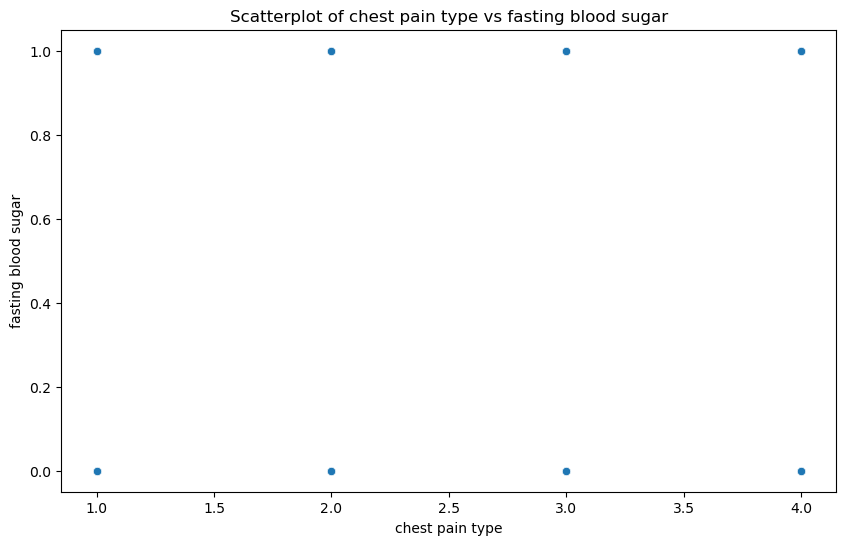

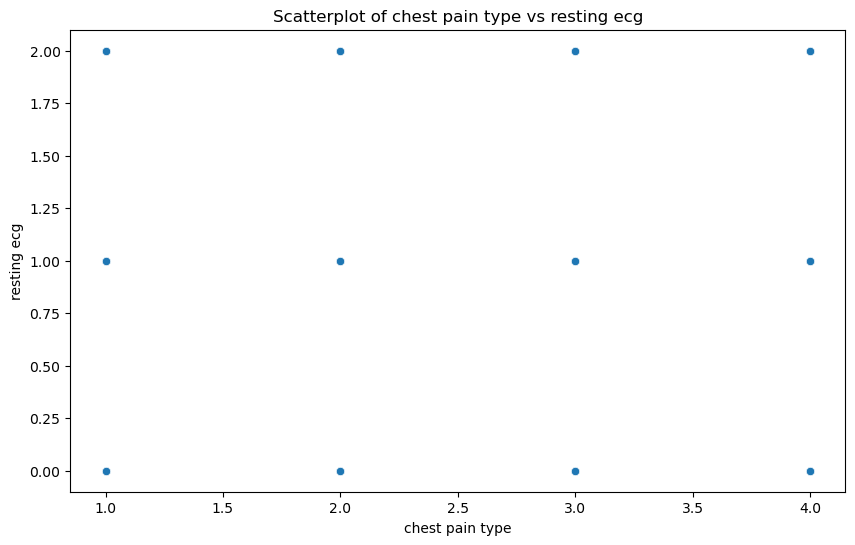

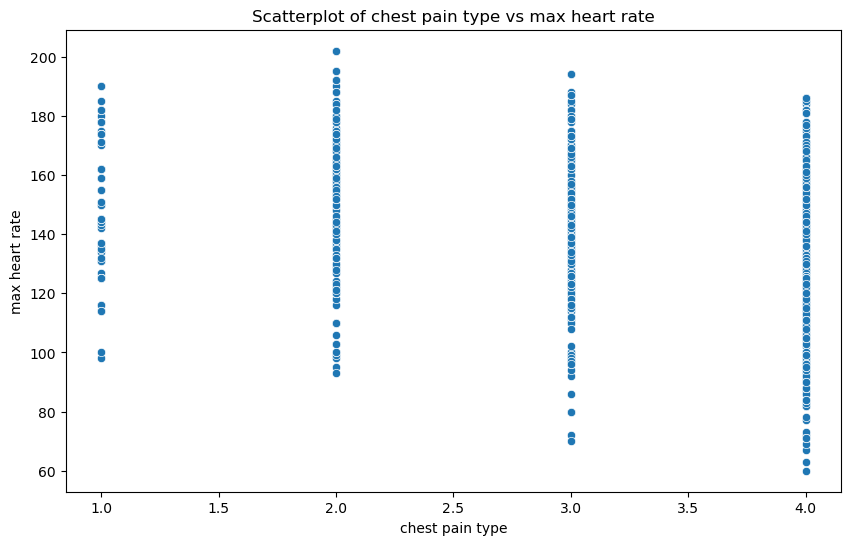

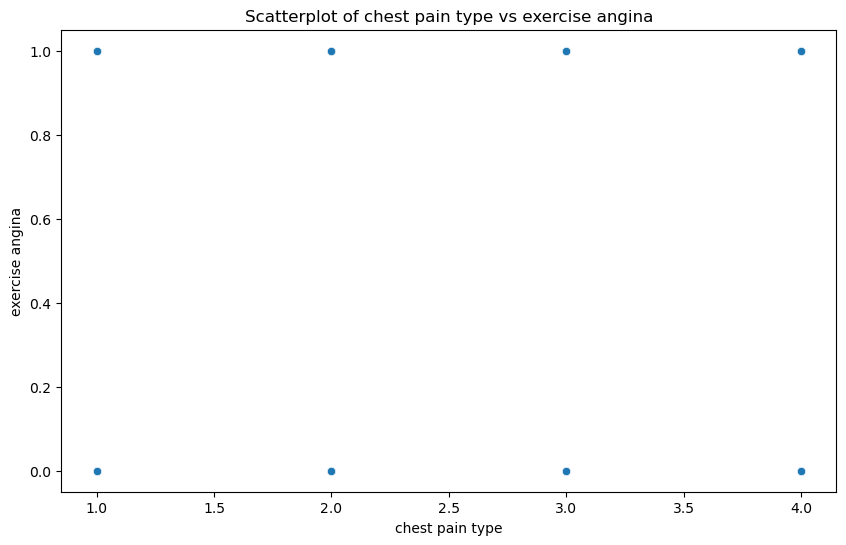

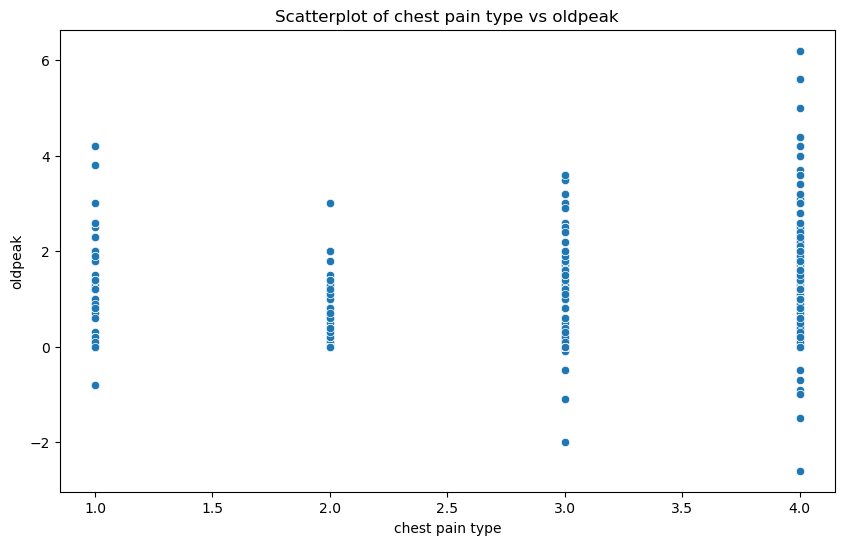

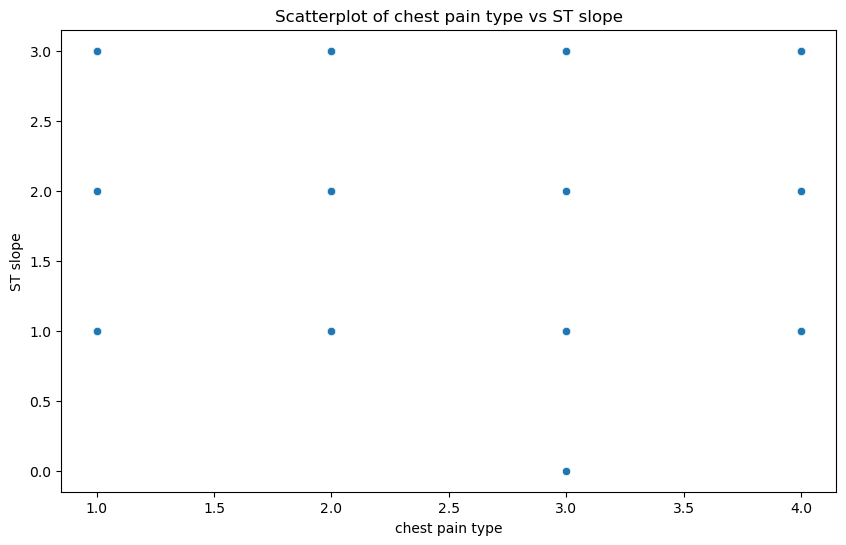

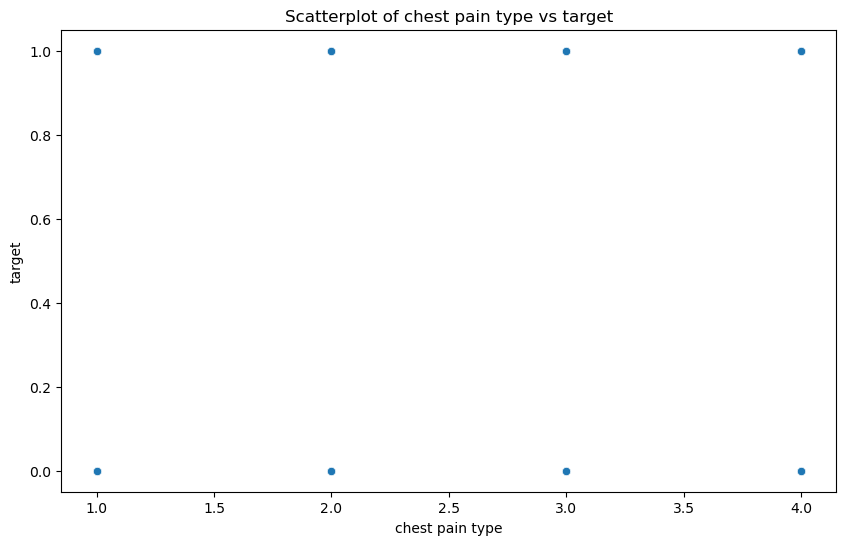

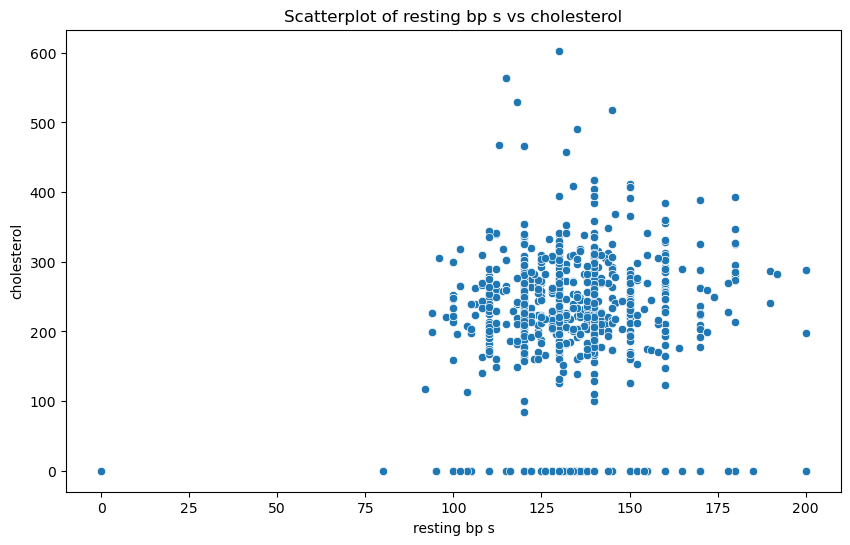

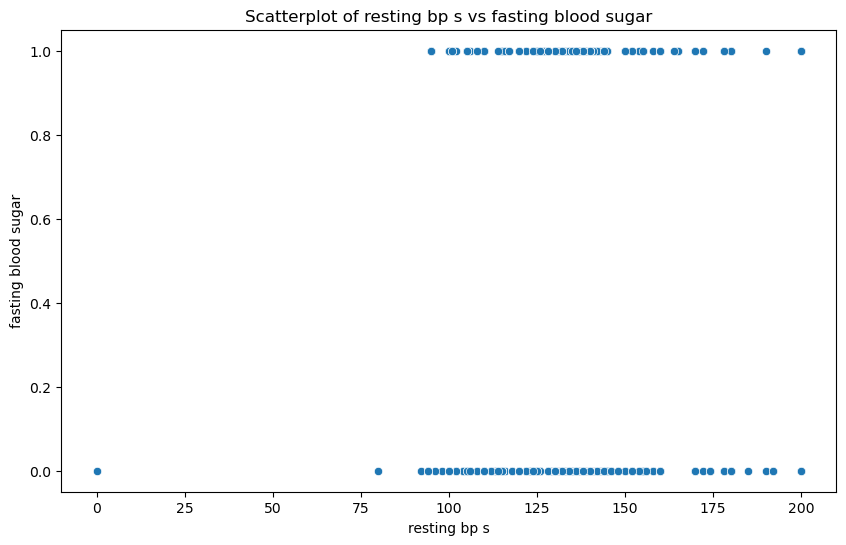

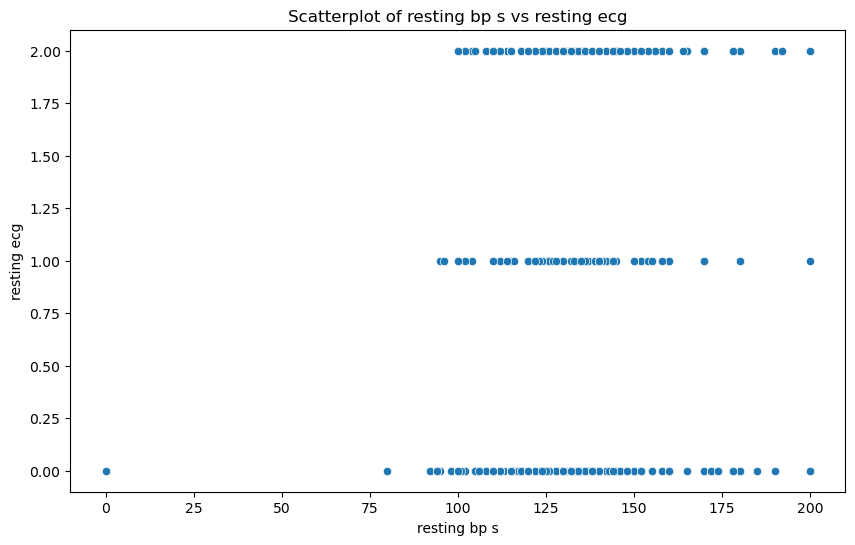

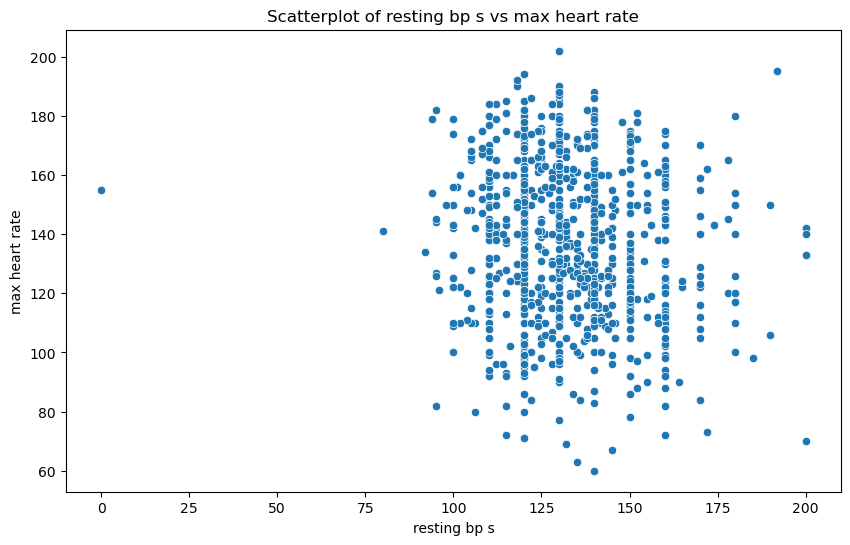

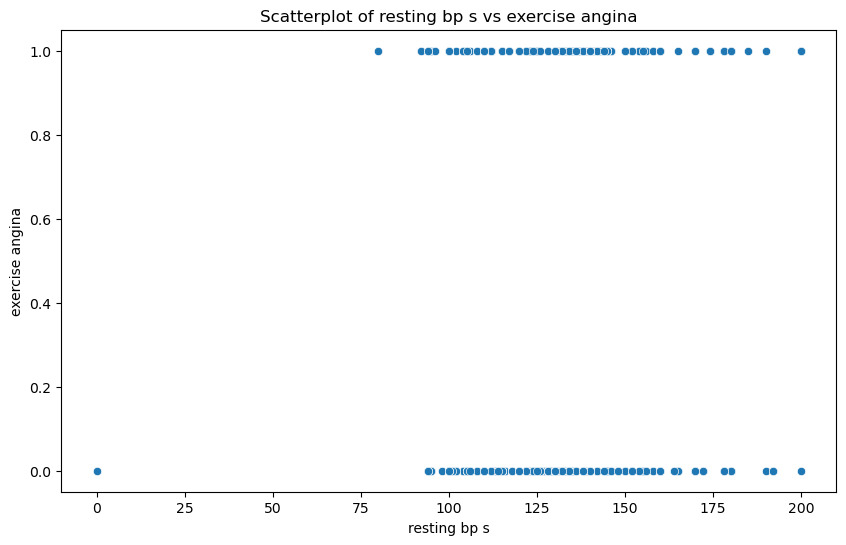

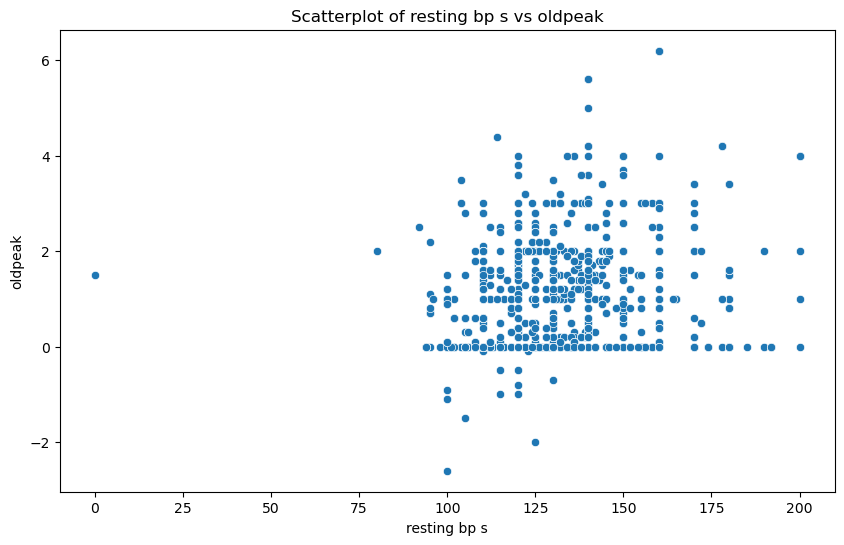

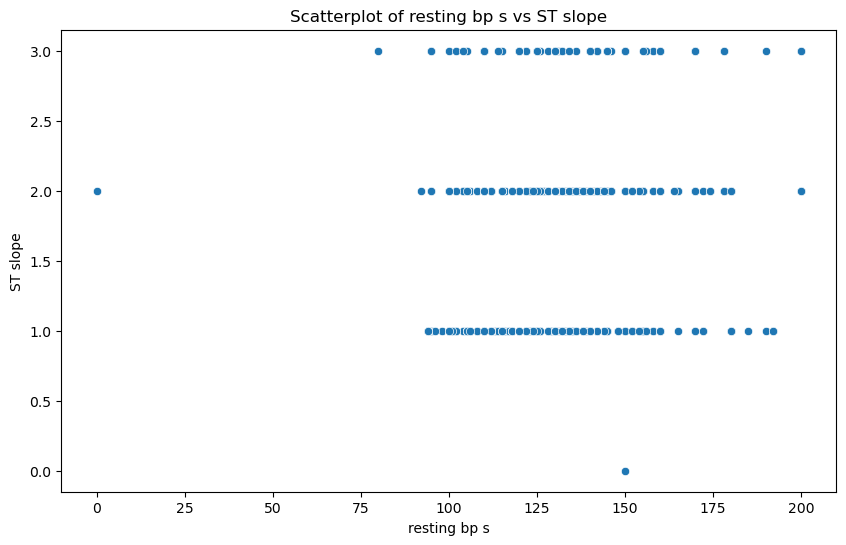

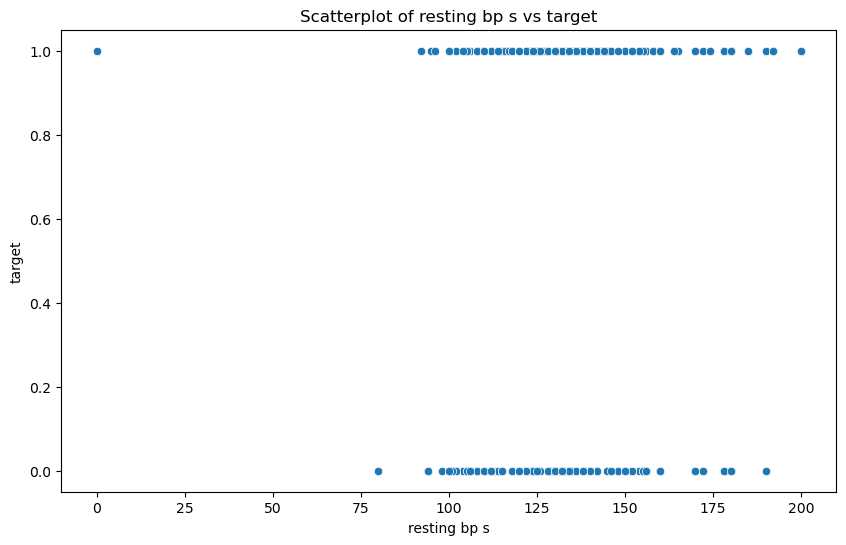

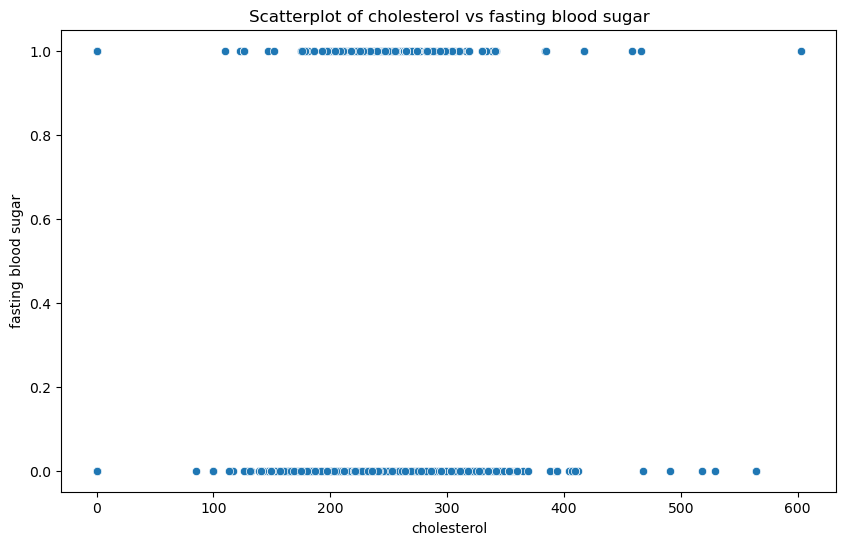

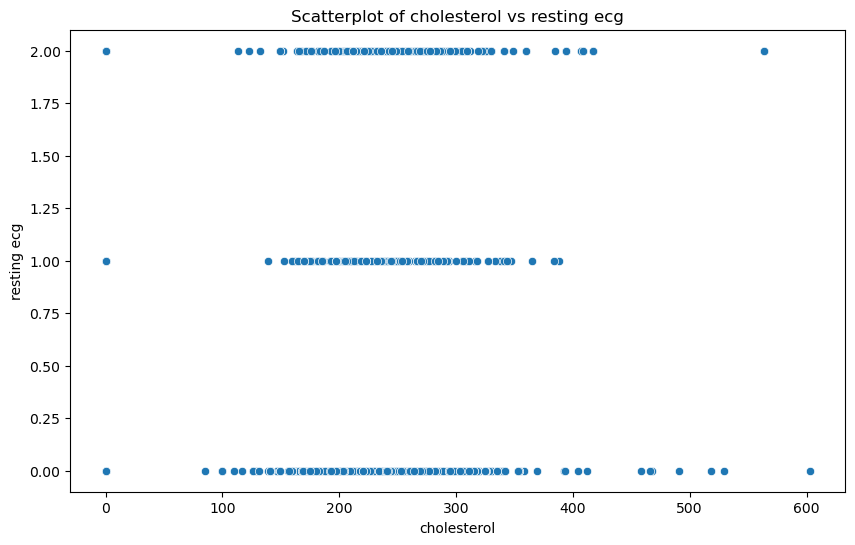

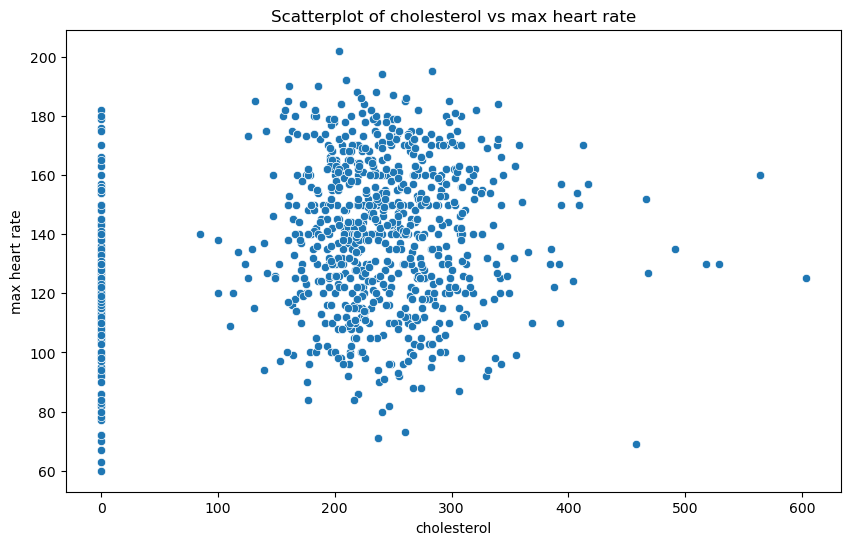

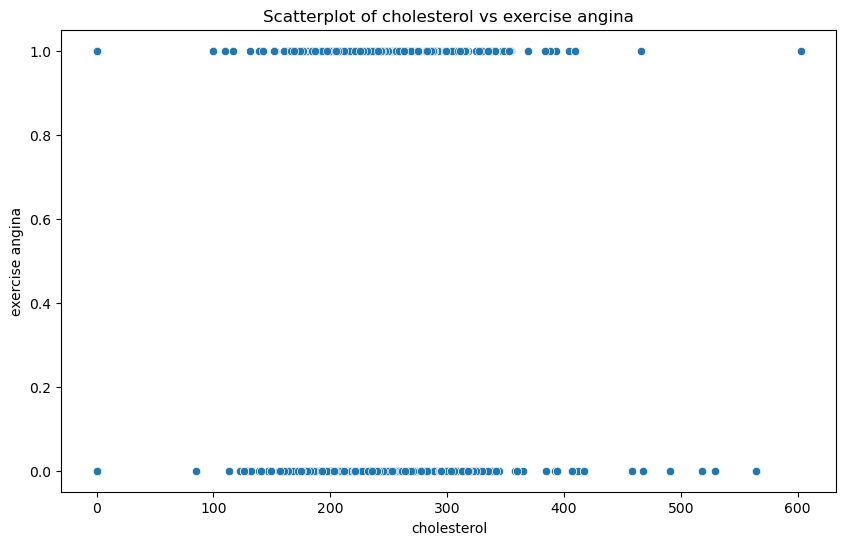

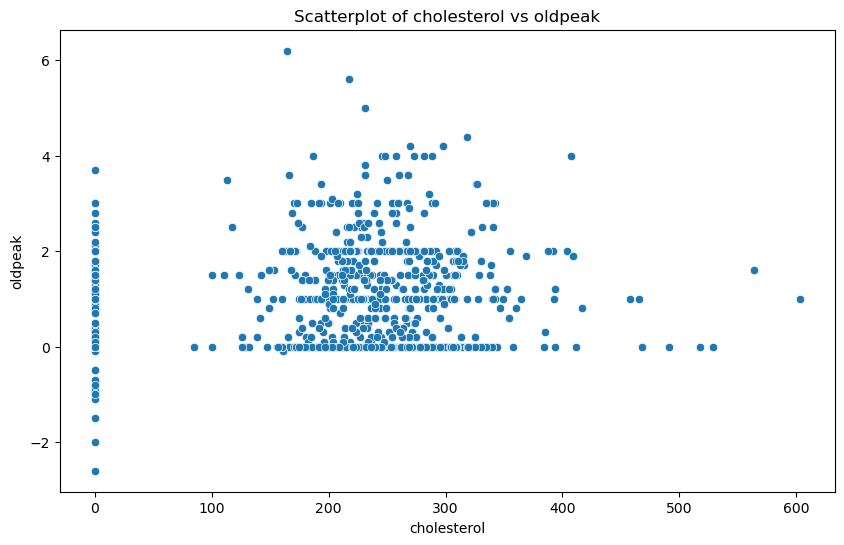

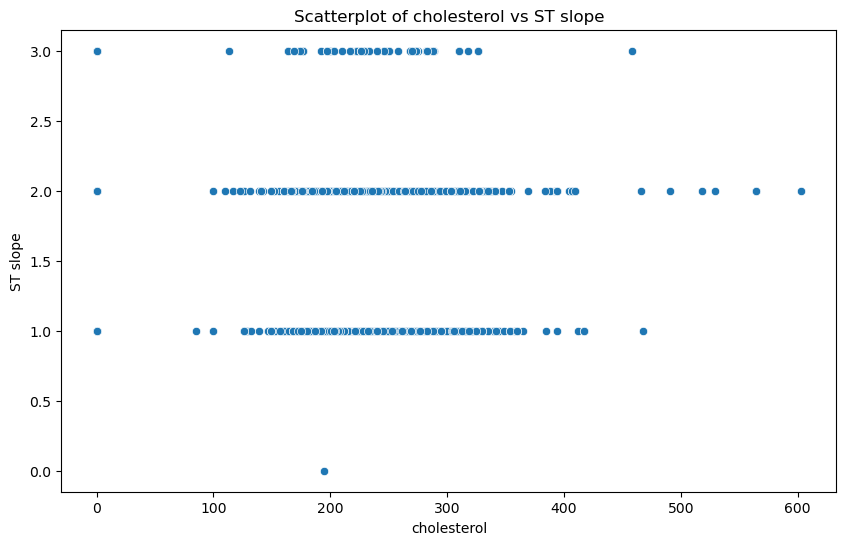

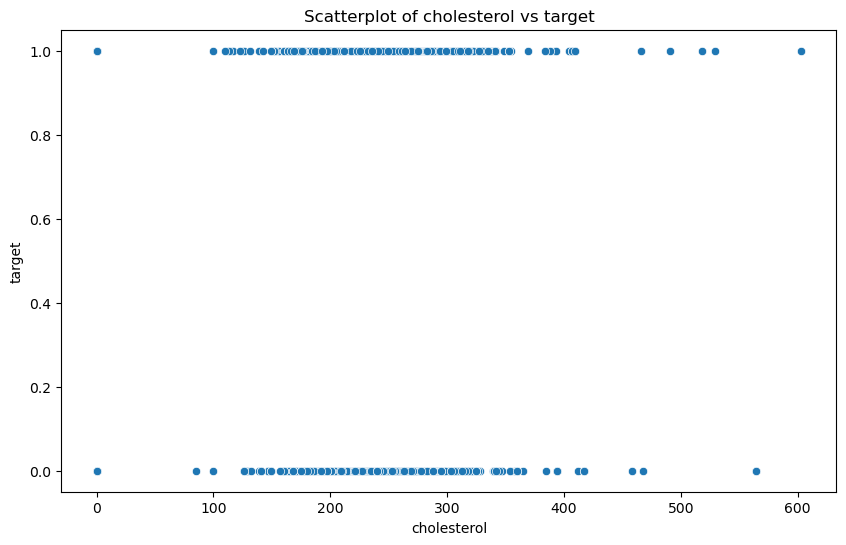

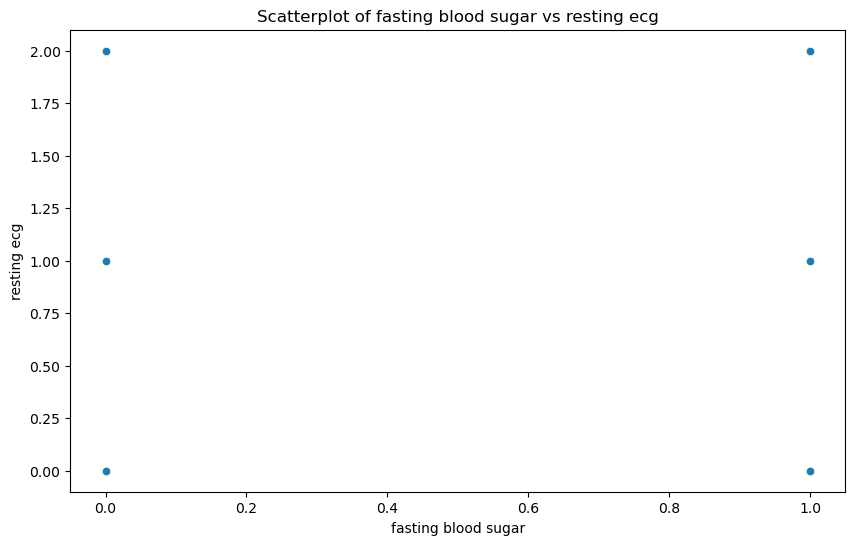

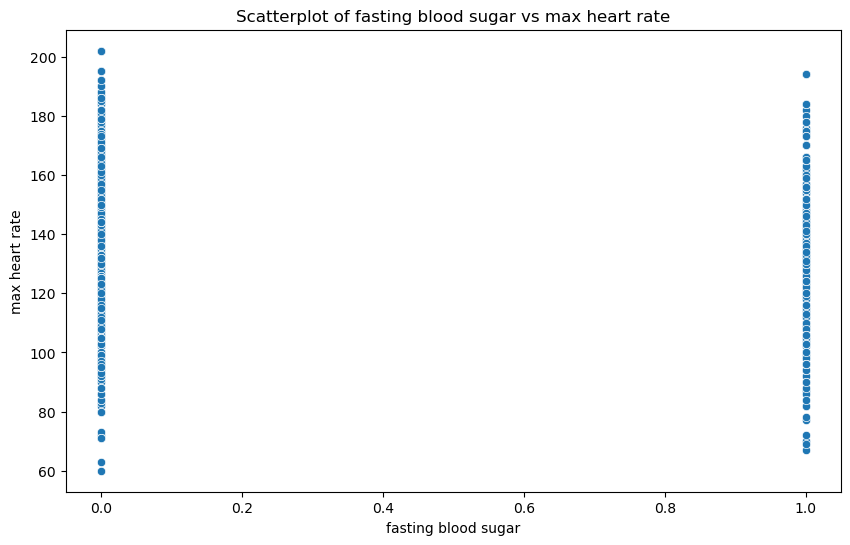

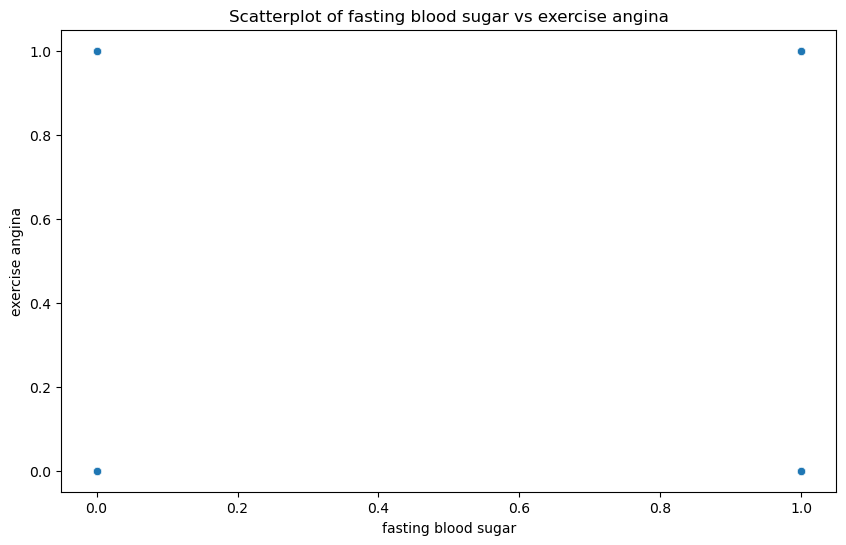

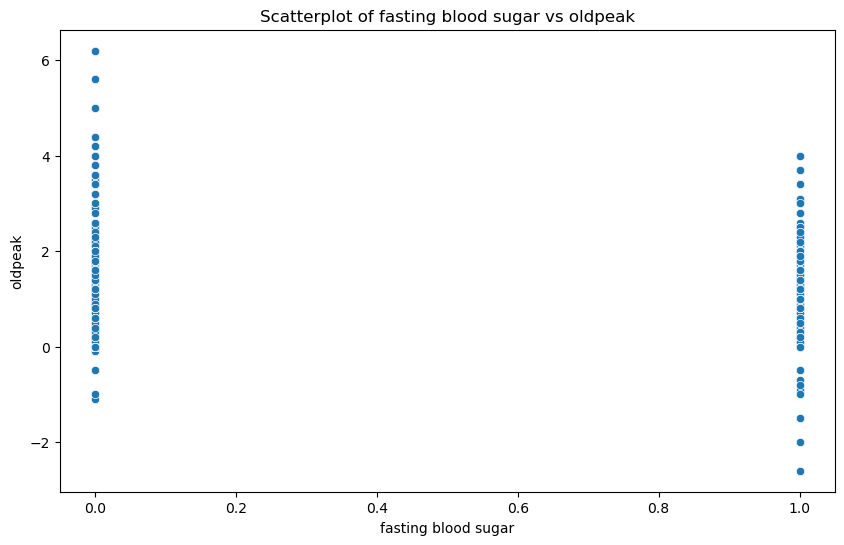

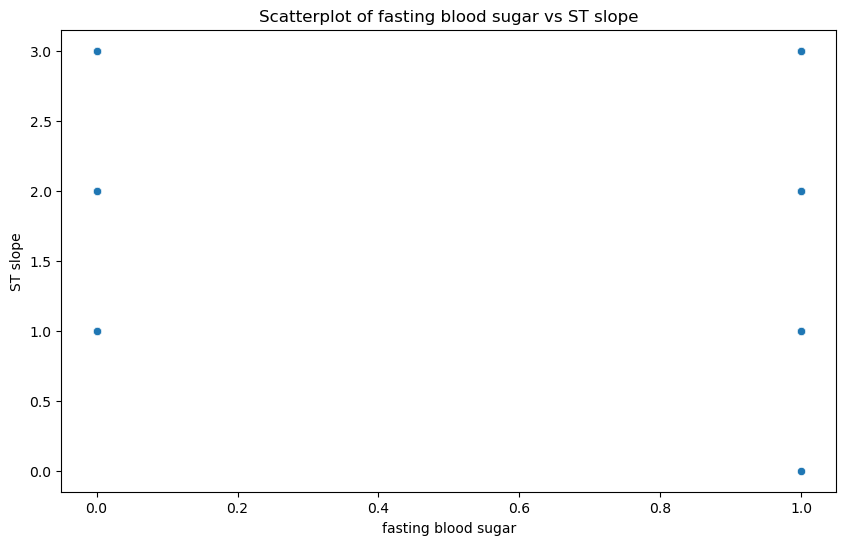

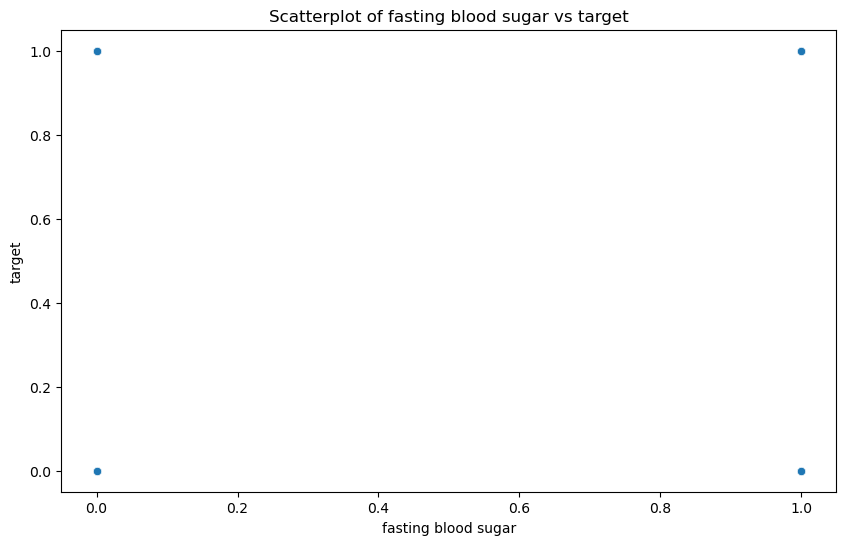

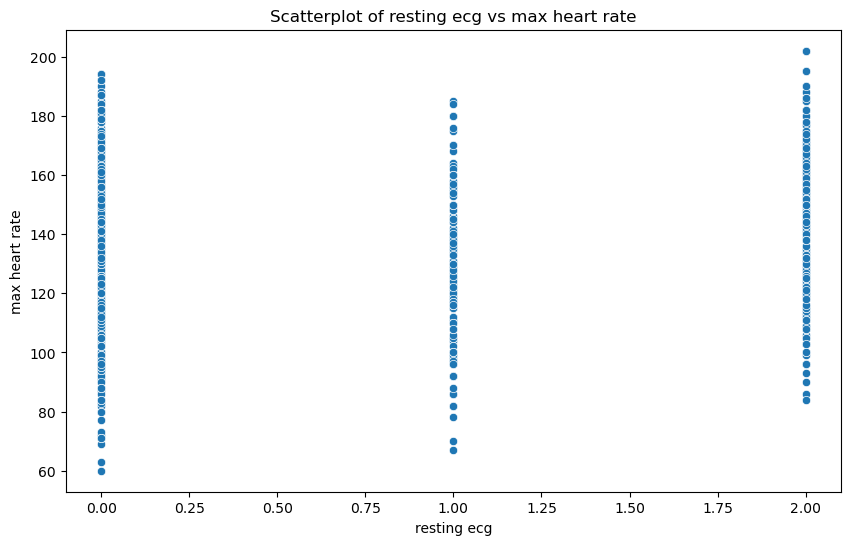

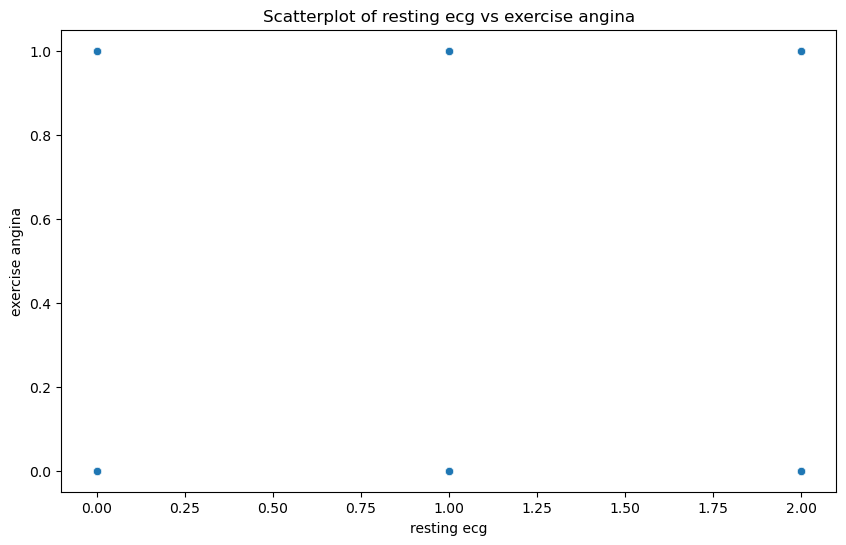

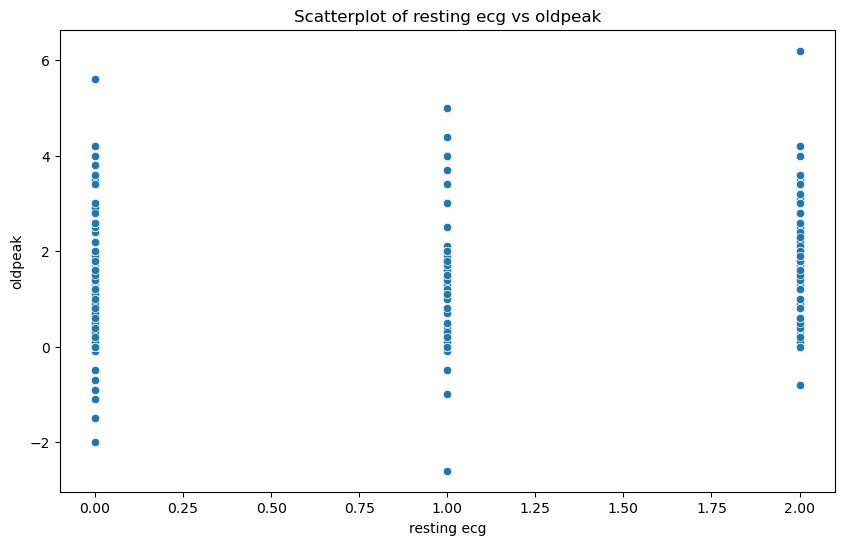

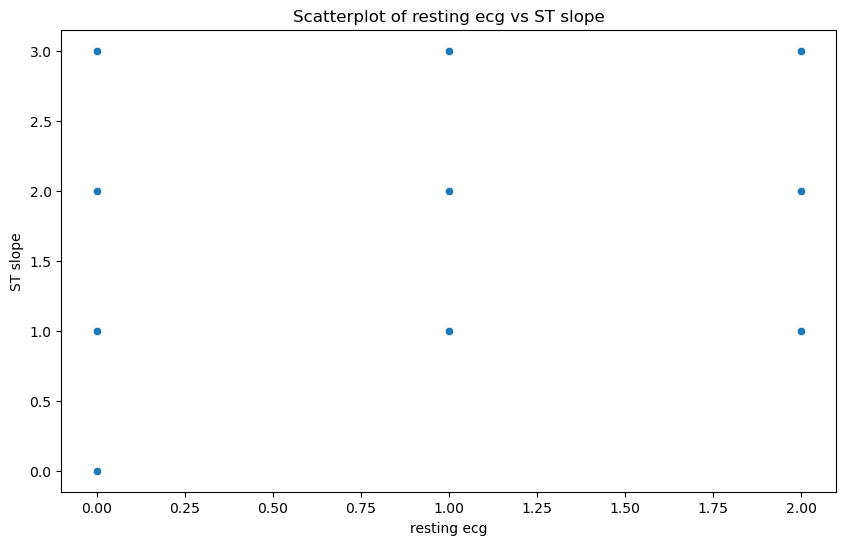

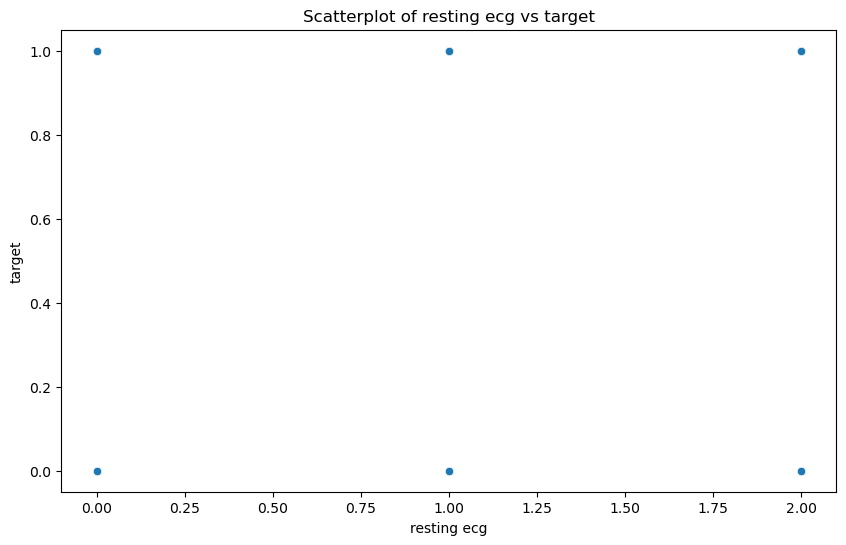

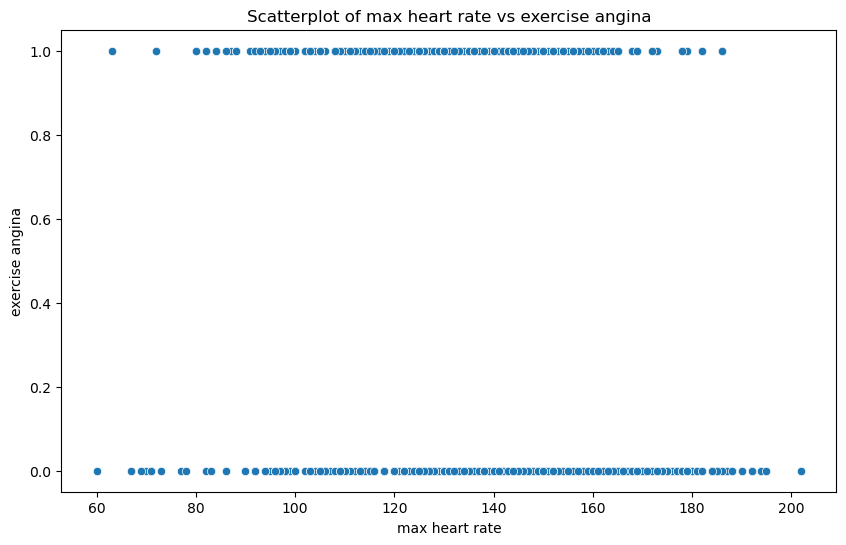

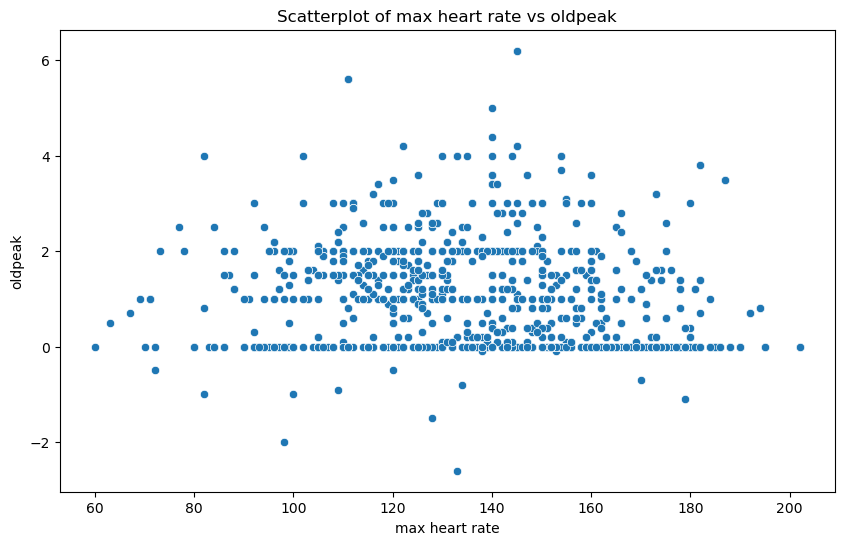

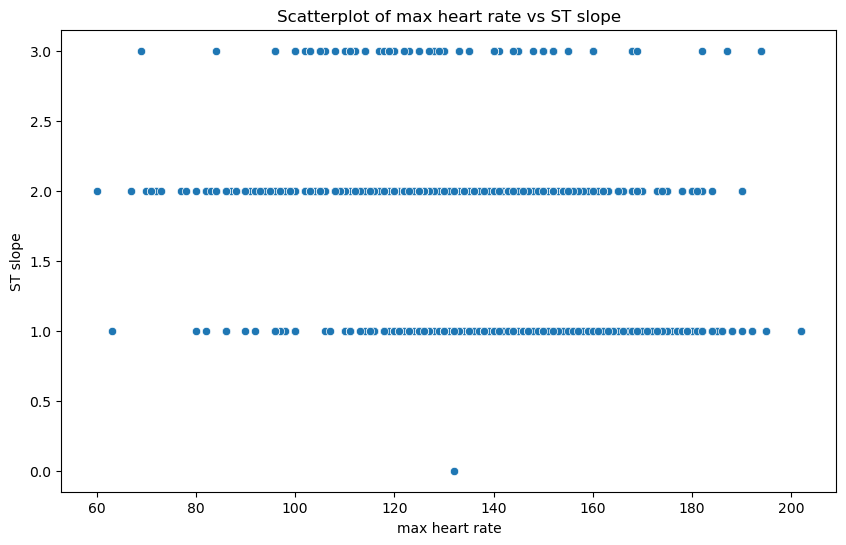

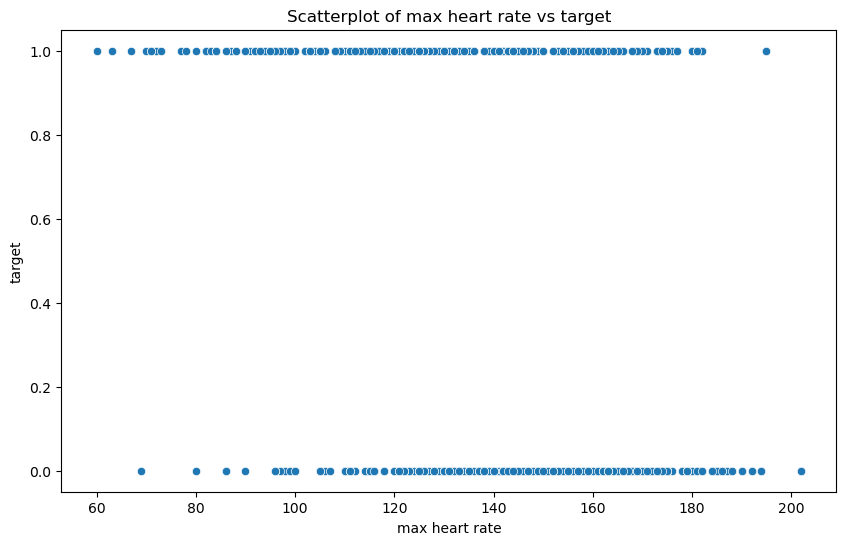

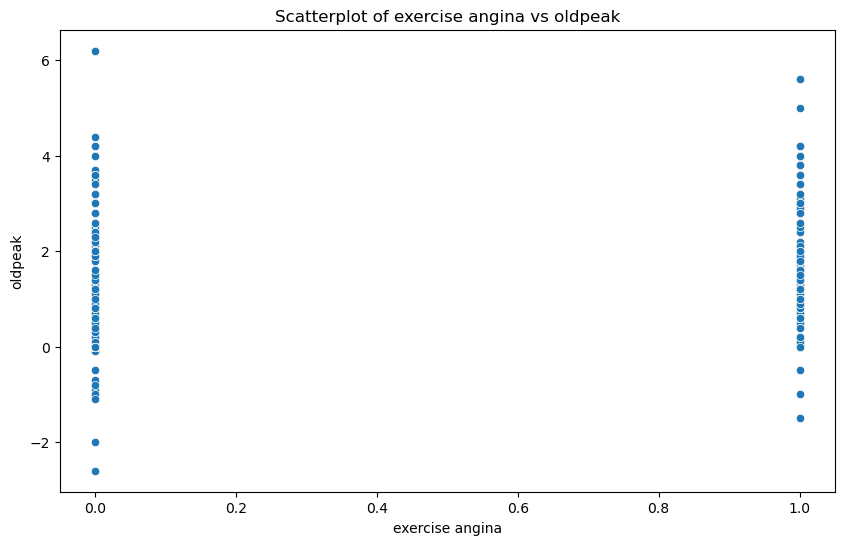

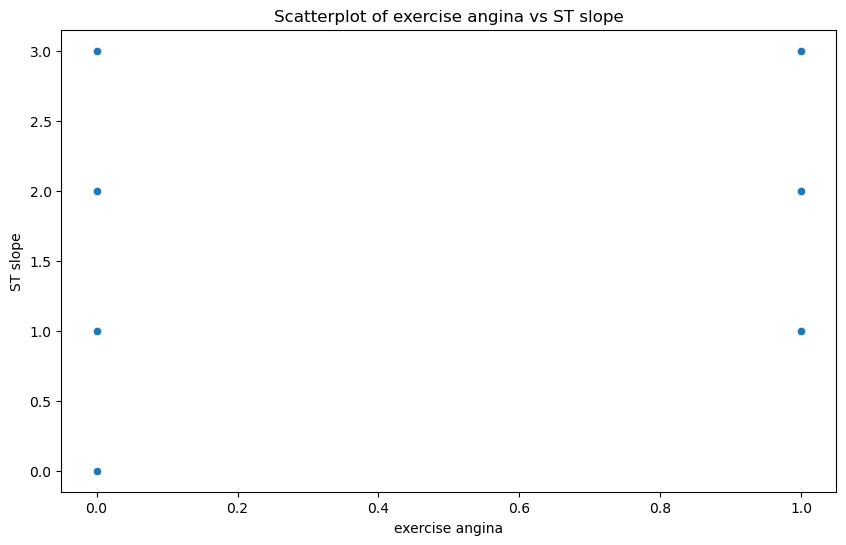

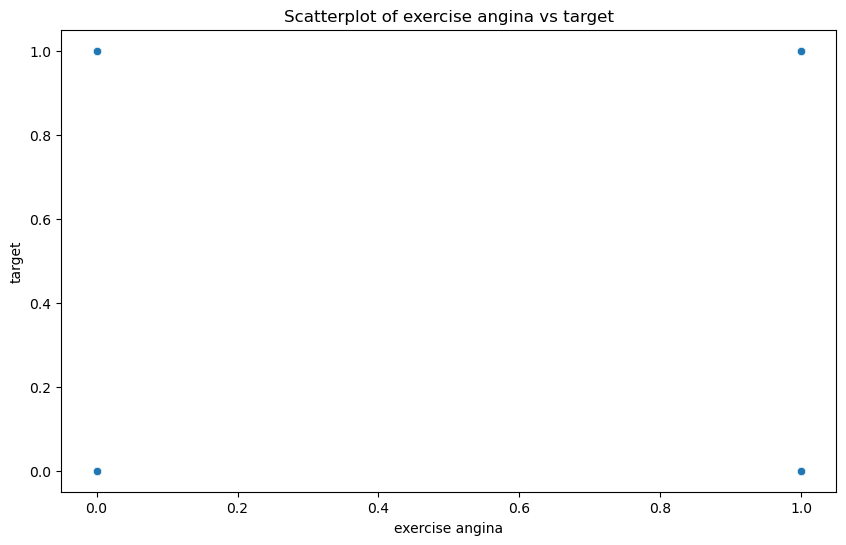

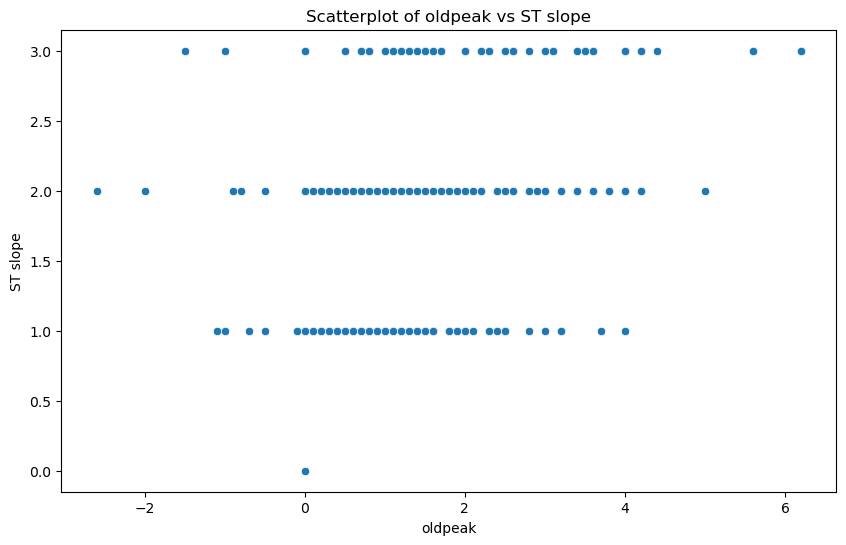

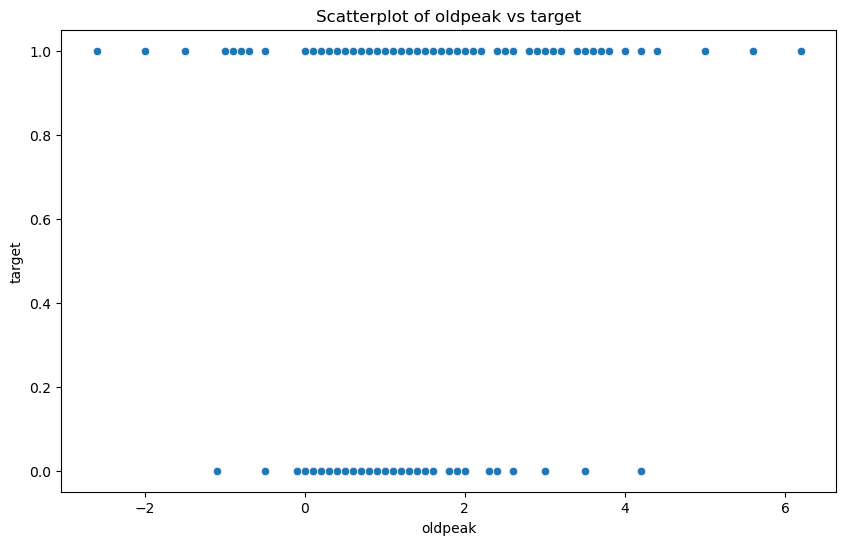

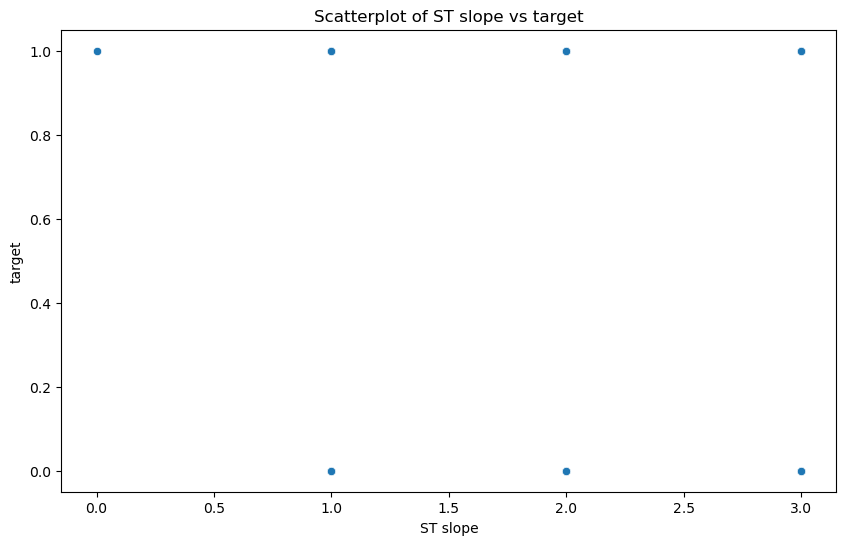

In [49]:
import itertools

# Assuming 'data' is your DataFrame containing all variables
cols = data.columns  # Get all column names from the DataFrame

# Generate all possible pairs of columns
column_pairs = list(itertools.combinations(cols, 2))

# Creating scatter plots for each pair
for column_pair in column_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=column_pair[0], y=column_pair[1])
    plt.title(f'Scatterplot of {column_pair[0]} vs {column_pair[1]}')
    plt.show()

In [56]:
y = data['target'] #Target variables/ Depedent variable

X= data.drop('target', axis = 1) #Independent

# Correlation Analysis

In [63]:
correlation = X.corrwith(y)
correlation

print("Correlation coefficients:")
print(correlation)

Correlation coefficients:
age                    0.262029
sex                    0.311267
chest pain type        0.460127
resting bp s           0.121415
cholesterol           -0.198366
fasting blood sugar    0.216695
resting ecg            0.073059
max heart rate        -0.413278
exercise angina        0.481467
oldpeak                0.398385
ST slope               0.505608
dtype: float64


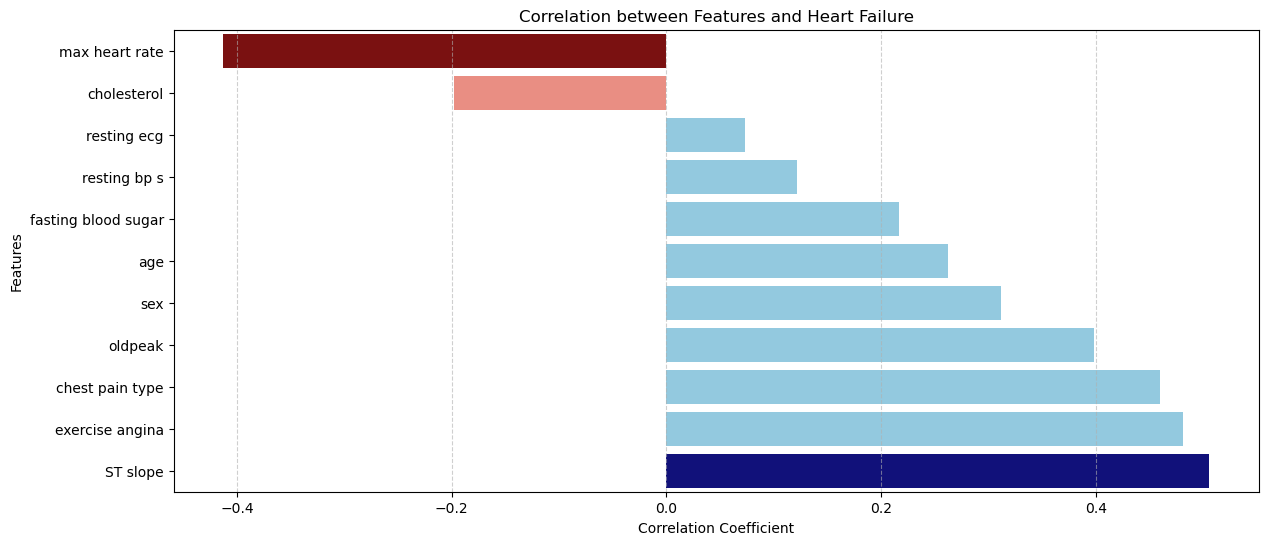

In [68]:

# Assuming 'correlation' contains the correlation coefficients between features and heart failure

# Sort the correlation values to identify the most positive and most negative correlations
sorted_correlation = correlation.sort_values()

# Determine the most positive and most negative correlations
most_positive = sorted_correlation.idxmax()
most_negative = sorted_correlation.idxmin()

# Create a color palette with different colors for positive and negative correlations
colors = ['skyblue' if corr >= 0 else 'salmon' for corr in sorted_correlation.values]

# Emphasize the most positive and most negative correlations
colors[sorted_correlation.index.get_loc(most_positive)] = 'darkblue'
colors[sorted_correlation.index.get_loc(most_negative)] = 'darkred'

# Plotting the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index, palette=colors)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation between Features and Heart Failure')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

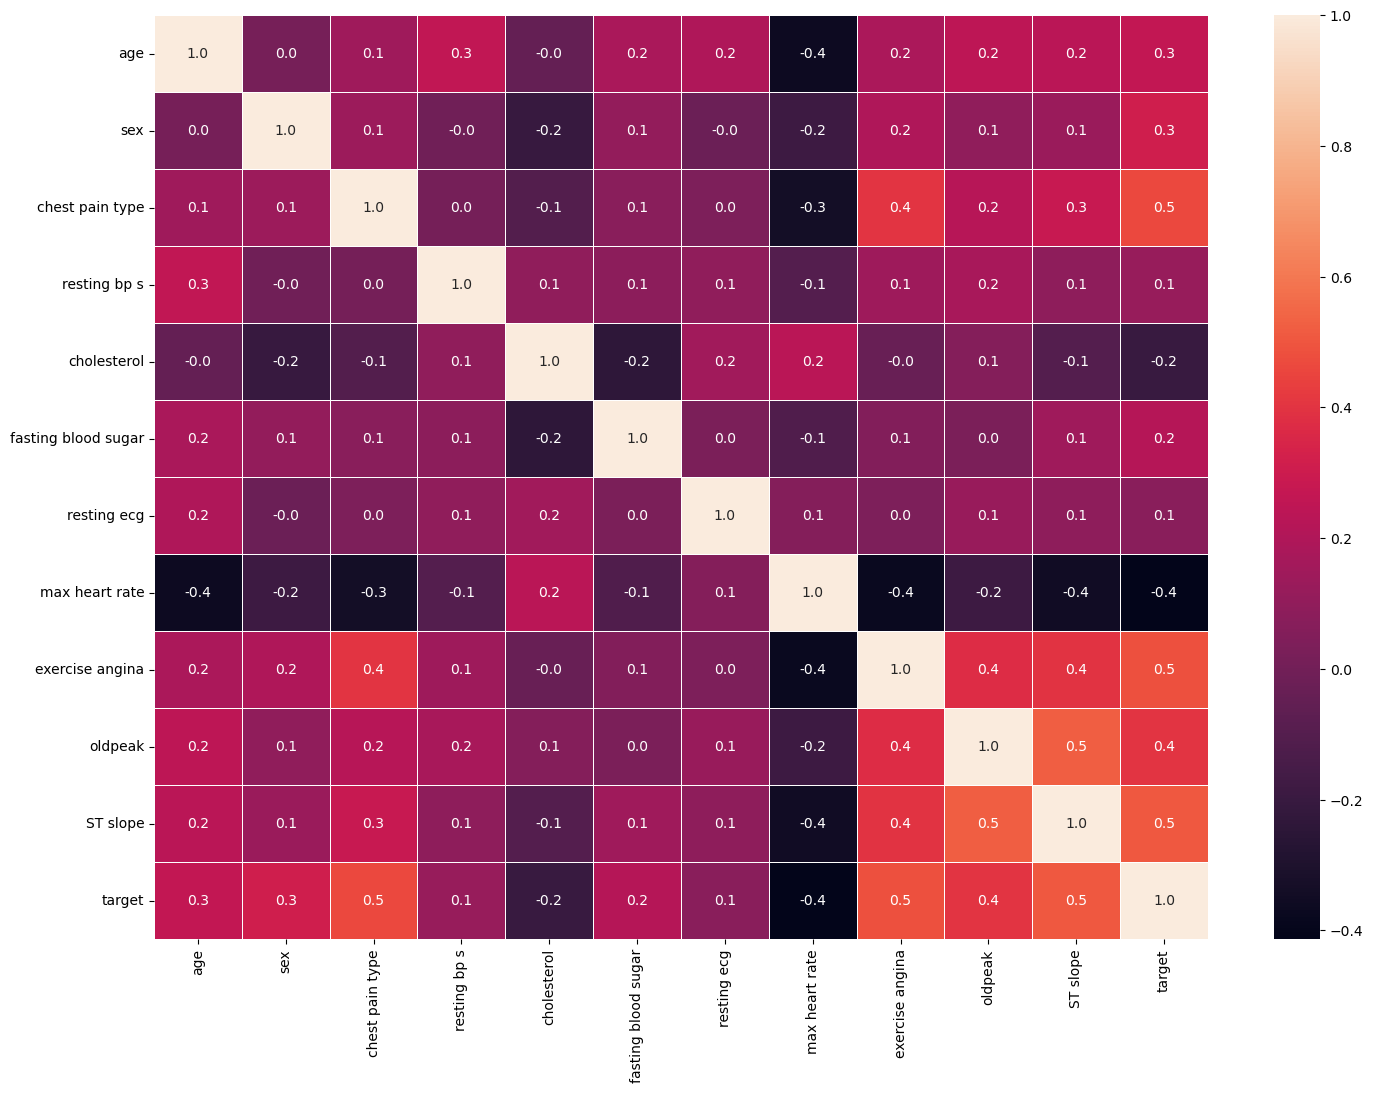

In [69]:
plt.figure(figsize=[17, 12])
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')
plt.show()

# Variance Inflation Factor

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

#Sorting the VIF data by VIF values in ascending order
vif_data_sorted = vif_data.sort_values(by="VIF")
  
print(vif_data_sorted)

                feature        VIF
5   fasting blood sugar   1.413133
6           resting ecg   1.757432
8       exercise angina   2.424592
9               oldpeak   2.499380
1                   sex   4.450046
4           cholesterol   6.387940
10             ST slope  11.932856
2       chest pain type  14.420512
7        max heart rate  23.287468
0                   age  34.318134
3          resting bp s  46.814719


Variance Inflation Factor above 10 will bring about multicollinearity.

Multicollinearity: two or more independent variables are highly correlated, weaken our predictive model

In [83]:
X = X.drop(['ST slope','exercise angina'], axis=1)
X.head(11)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,oldpeak
0,40,1,2,140,289,0,0,172,0.0
1,49,0,3,160,180,0,0,156,1.0
2,37,1,2,130,283,0,1,98,0.0
3,48,0,4,138,214,0,0,108,1.5
4,54,1,3,150,195,0,0,122,0.0


In [90]:
X.columns
len(X.columns)

9

# Modelling

In [91]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
#use of a standard scaler to make sure every feature plays a fair role in prediction 
#standard scaler

sc = StandardScaler()

# Fit the scaler to your data (computes mean and standard deviation)
sc.fit(X)

# Transform the training and test data to standardize them
X_train_standardized = sc.transform(X)
X_test_standardized = sc.transform(X_test)

It transforms the data to have a mean of 0 and a standard deviation of 1. This is also known as standardizing the data.

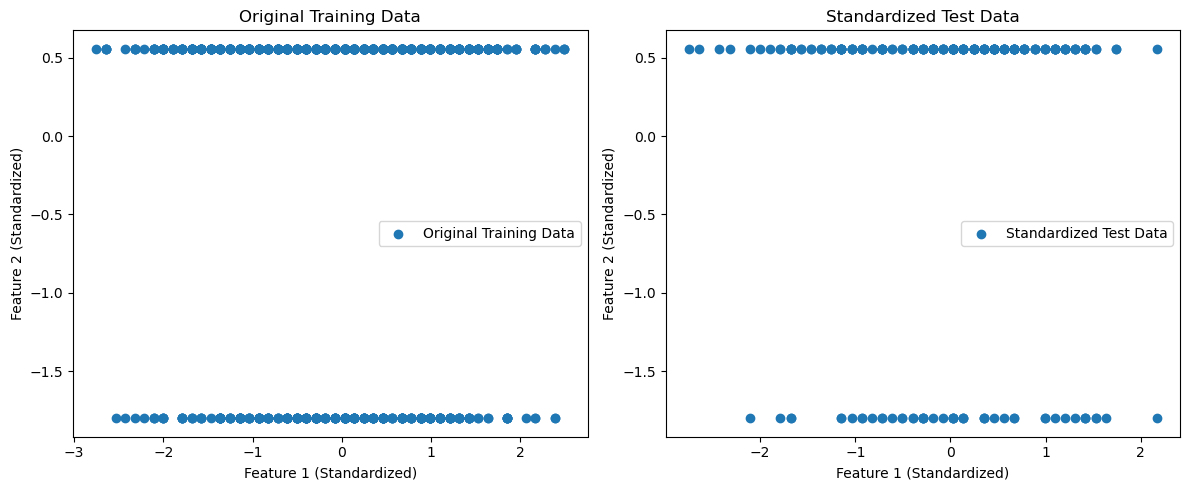

In [93]:
# Separate the features for plotting
feature1_train = X_train_standardized[:, 0]
feature2_train = X_train_standardized[:, 1]

feature1_test = X_test_standardized[:, 0]
feature2_test = X_test_standardized[:, 1]

# Plot the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(feature1_train, feature2_train, marker='o', label='Original Training Data')
plt.title('Original Training Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()

# Plot the standardized data
plt.subplot(1, 2, 2)
plt.scatter(feature1_test, feature2_test, marker='o', label='Standardized Test Data')
plt.title('Standardized Test Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()

plt.tight_layout()
plt.show()

Training Logistic Regression...
Accuracy for Logistic Regression: 0.84
Confusion Matrix for Logistic Regression:
[[ 87  20]
 [ 19 112]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       107
           1       0.85      0.85      0.85       131

    accuracy                           0.84       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.84      0.84      0.84       238

AUC-ROC for Logistic Regression: 0.90


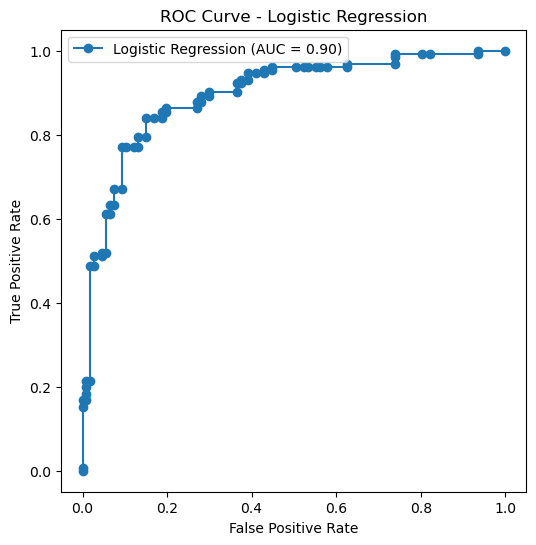



Training Decision Tree...
Accuracy for Decision Tree: 1.00
Confusion Matrix for Decision Tree:
[[107   0]
 [  0 131]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

AUC-ROC for Decision Tree: 1.00


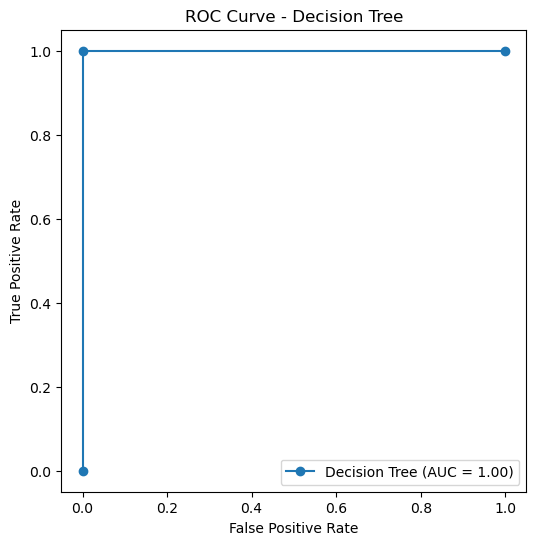



Training Random Forest...
Accuracy for Random Forest: 1.00
Confusion Matrix for Random Forest:
[[107   0]
 [  0 131]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

AUC-ROC for Random Forest: 1.00


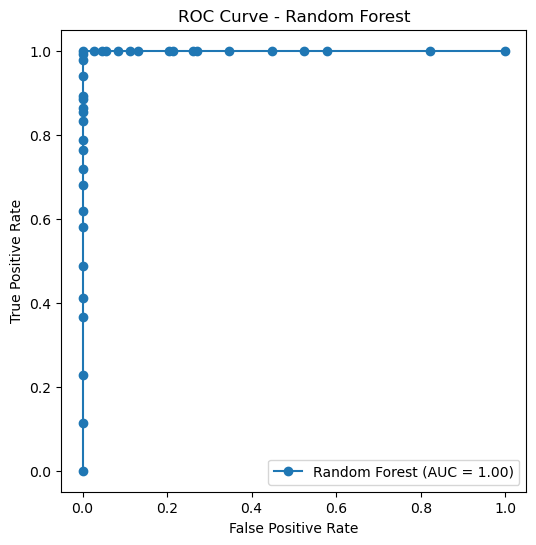



Training MLP Classifier...
Accuracy for MLP Classifier: 0.89
Confusion Matrix for MLP Classifier:
[[ 95  12]
 [ 13 118]]
Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       107
           1       0.91      0.90      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.90      0.89      0.90       238

MLP Classifier does not support predict_proba, so AUC-ROC cannot be calculated.


Training XGBoost...
Accuracy for XGBoost: 1.00
Confusion Matrix for XGBoost:
[[107   0]
 [  0 131]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       

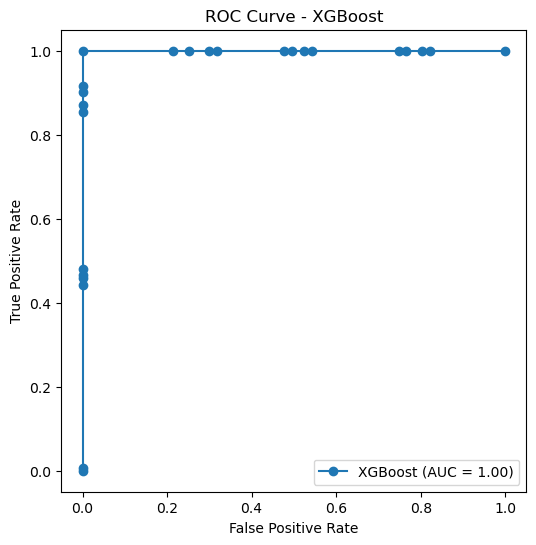

In [94]:
models = {
    'Logistic Regression': LogisticRegressionCV(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLP Classifier': MLPClassifier(),
    'XGBoost': XGBClassifier()
}

# Iterate through models and evaluate each one
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_standardized, y)
    
    # Predictions
    y_pred = model.predict(X_test_standardized)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{confusion}")
    
    # Classification Report
    classification_rep = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{classification_rep}")
    
    # ROC Curve and AUC
    if name != 'MLP Classifier':  # MLP Classifier doesn't have predict_proba
        y_prob = model.predict_proba(X_test_standardized)[:, 1]  # Probability of class 1
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC for {name}: {roc_auc:.2f}")
    
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, marker='o', label=f"{name} (AUC = {roc_auc:.2f})")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()
    else:
        print("MLP Classifier does not support predict_proba, so AUC-ROC cannot be calculated.")
    
    print("\n")